In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind


In [9]:
df=pd.read_csv("AutoInsurance.csv")

In [10]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [11]:
df.shape

(9134, 24)

In [12]:
df.describe(include="all").T

count unique            top  freq  \
Customer                         9134   9134        BU79786     1   
State                            9134      5     California  3150   
Customer Lifetime Value        9134.0    NaN            NaN   NaN   
Response                         9134      2             No  7826   
Coverage                         9134      3          Basic  5568   
Education                        9134      5       Bachelor  2748   
Effective To Date                9134     59      10/1/2011   195   
EmploymentStatus                 9134      5       Employed  5698   
Gender                           9134      2              F  4658   
Income                         9134.0    NaN            NaN   NaN   
Location Code                    9134      3       Suburban  5779   
Marital Status                   9134      3        Married  5298   
Monthly Premium Auto           9134.0    NaN            NaN   NaN   
Months Since Last Claim        9134.0    NaN            NaN   NaN   
Months Since Policy Inception  9134.0    NaN            NaN   NaN   
Number of Open Complaints      9134.0    NaN            NaN   NaN   
Number of Policies             9134.0    NaN            NaN   NaN   
Policy Type                      9134      3  Personal Auto  6788   
Policy                           9134      9    Personal L3  3426   
Renew Offer Type                 9134      4         Offer1  3752   
Sales Channel                    9134      4          Agent  3477   
Total Claim Amount             9134.0    NaN            NaN   NaN   
Vehicle Class                    9134      6  Four-Door Car  4621   
Vehicle Size                     9134      3        Medsize  6424   

                                       mean           std          min  \
Customer                                NaN           NaN          NaN   
State                                   NaN           NaN          NaN   
Customer Lifetime Value         8004.940475   6870.967608  1898.007675   
Response                                NaN           NaN          NaN   
Coverage                                NaN           NaN          NaN   
Education                               NaN           NaN          NaN   
Effective To Date                       NaN           NaN          NaN   
EmploymentStatus                        NaN           NaN          NaN   
Gender                                  NaN           NaN          NaN   
Income                         37657.380009  30379.904734          0.0   
Location Code                           NaN           NaN          NaN   
Marital Status                          NaN           NaN          NaN   
Monthly Premium Auto              93.219291     34.407967         61.0   
Months Since Last Claim              15.097     10.073257          0.0   
Months Since Policy Inception     48.064594     27.905991          0.0   
Number of Open Complaints          0.384388      0.910384          0.0   
Number of Policies                  2.96617      2.390182          1.0   
Policy Type                             NaN           NaN          NaN   
Policy                                  NaN           NaN          NaN   
Renew Offer Type                        NaN           NaN          NaN   
Sales Channel                           NaN           NaN          NaN   
Total Claim Amount               434.088794    290.500092     0.099007   
Vehicle Class                           NaN           NaN          NaN   
Vehicle Size                            NaN           NaN          NaN   

                                       25%          50%          75%  \
Customer                               NaN          NaN          NaN   
State                                  NaN          NaN          NaN   
Customer Lifetime Value        3994.251794  5780.182197  8962.167041   
Response                               NaN          NaN          NaN   
Coverage                               NaN          NaN          NaN   
Education              

In [13]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [14]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [15]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Axes(0.125,0.11;0.775x0.77)


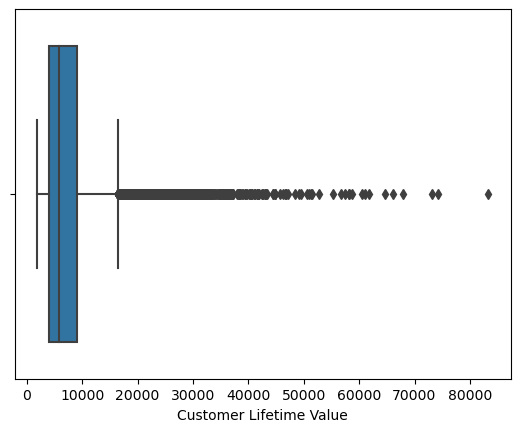

None
Axes(0.125,0.11;0.775x0.77)


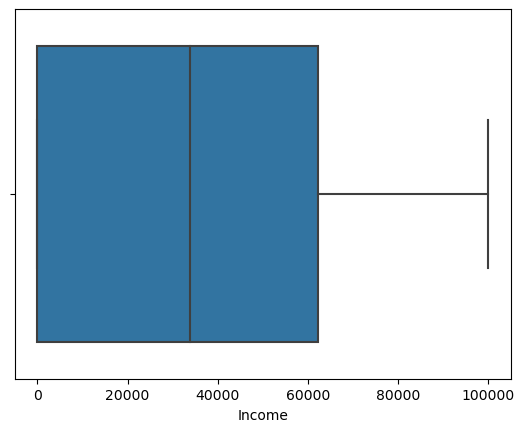

None
Axes(0.125,0.11;0.775x0.77)


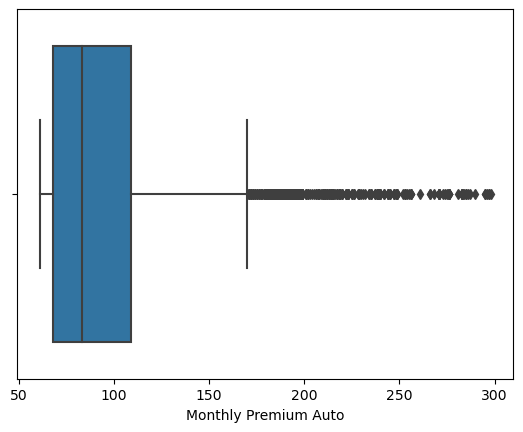

None
Axes(0.125,0.11;0.775x0.77)


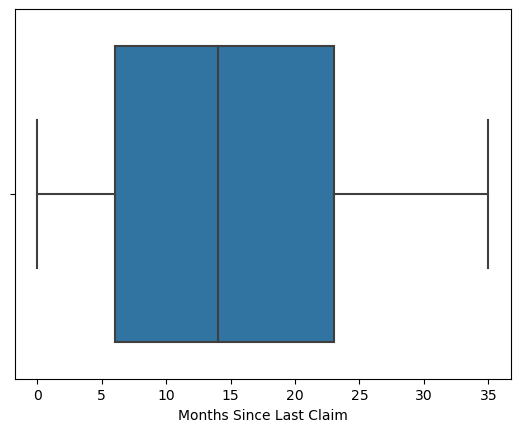

None
Axes(0.125,0.11;0.775x0.77)


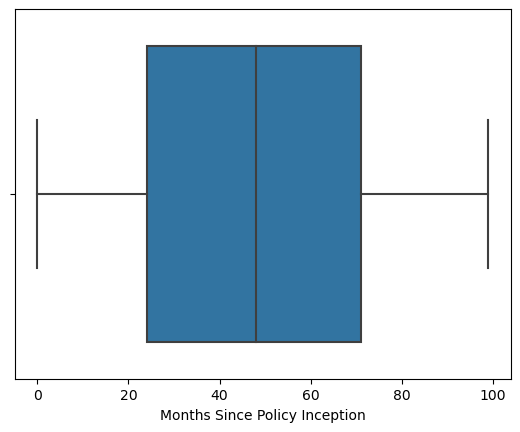

None
Axes(0.125,0.11;0.775x0.77)


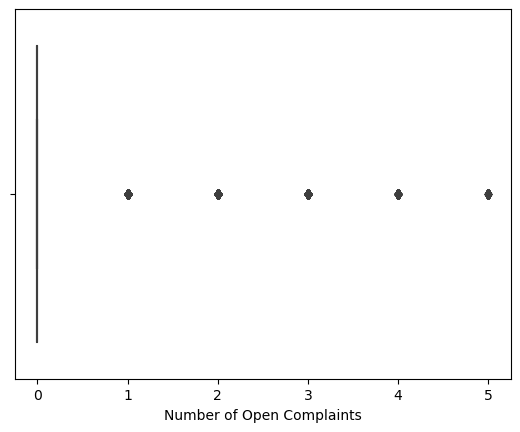

None
Axes(0.125,0.11;0.775x0.77)


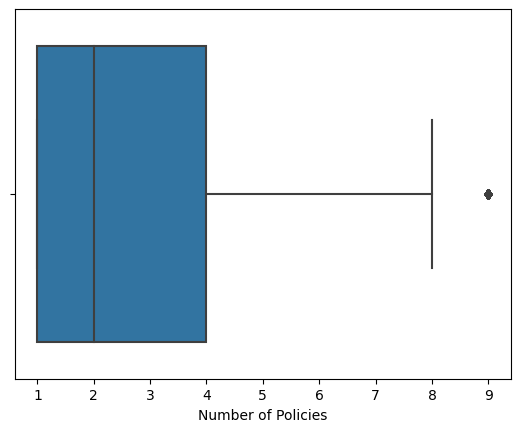

None
Axes(0.125,0.11;0.775x0.77)


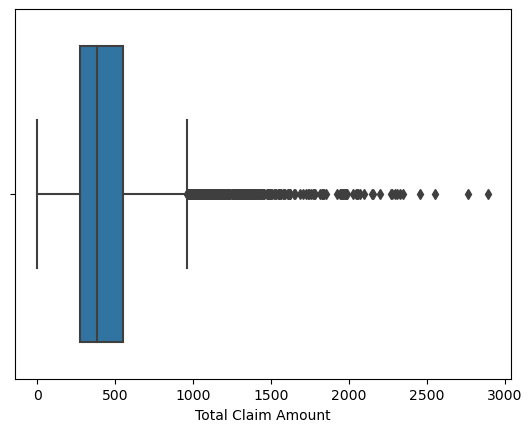

None


In [16]:
for i in df.select_dtypes("number").columns:     ### total
    print(sns.boxplot(x=df[i],data=df))
    print(plt.show())

In [17]:
df.skew().sort_values(ascending=False)

Customer Lifetime Value          3.032280
Number of Open Complaints        2.783263
Monthly Premium Auto             2.123546
Total Claim Amount               1.714966
Number of Policies               1.253333
Income                           0.286887
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
dtype: float64

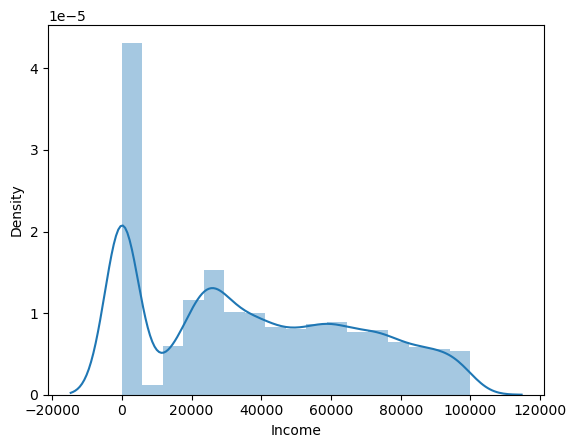

In [18]:
sns.distplot(df['Income'])
plt.show()

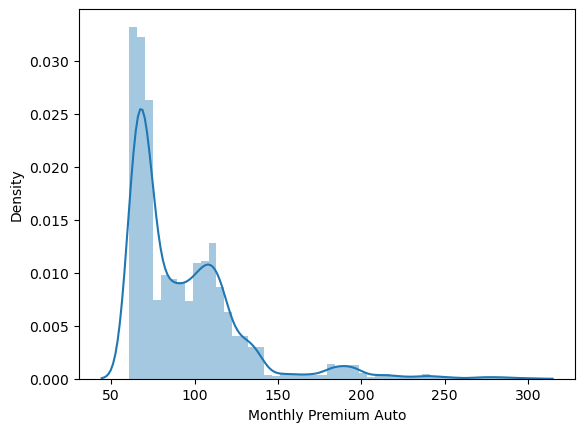

In [19]:
sns.distplot(df['Monthly Premium Auto'])
plt.show()

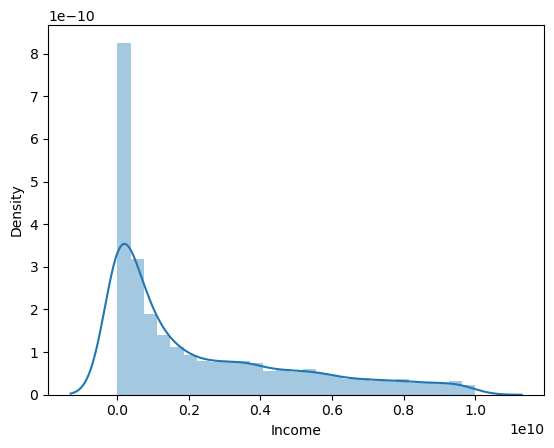

In [20]:
sns.distplot(df['Income']**2)
plt.show()

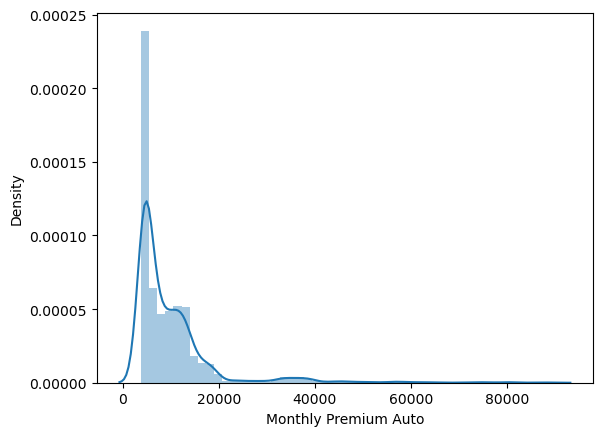

In [21]:
sns.distplot(df['Monthly Premium Auto']**(2))
plt.show()

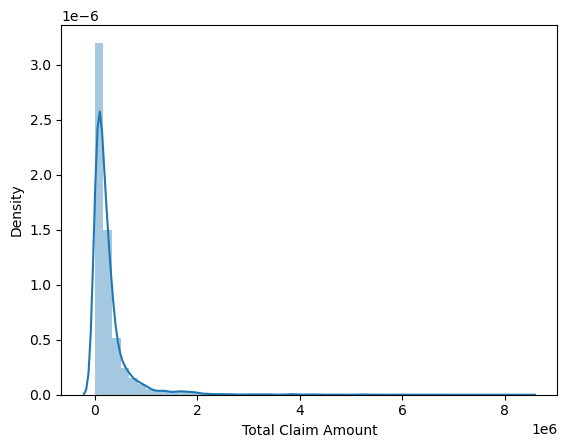

In [22]:
sns.distplot(df['Total Claim Amount']**2)
plt.show()

In [23]:
# Selecting only categorical data and assigning it into ObjectData
ObjectData=df.select_dtypes("object")

In [24]:
ObjectData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [25]:
ObjectData.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [26]:
ObjectData.head()

Customer       State Response  Coverage Education Effective To Date  \
0  BU79786  Washington       No     Basic  Bachelor           2/24/11   
1  QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2  AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3  WW63253  California       No     Basic  Bachelor           1/20/11   
4  HB64268  Washington       No     Basic  Bachelor          3/2/2011   

  EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   
3       Unemployed      M      Suburban        Married  Corporate Auto   
4         Employed      M         Rural         Single   Personal Auto   

         Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3  Corporate L2           Offer1   Call Center            SUV      Medsize  
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize

In [27]:
ObjectData.drop(['Customer','Effective To Date'],axis=1,inplace=True)

In [28]:
for i in ObjectData.columns:
    print(ObjectData[i].value_counts(),"\n")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

No     7826
Yes    1308
Name: Response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64 

F    4658
M    4476
Name: Gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Cor

# Univariate data visulization

Axes(0.125,0.11;0.775x0.77)


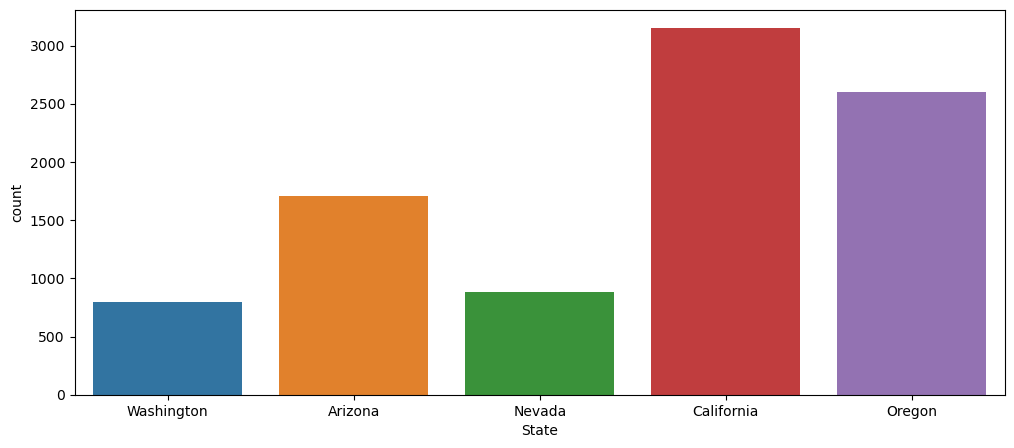

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
Axes(0.125,0.11;0.775x0.77)


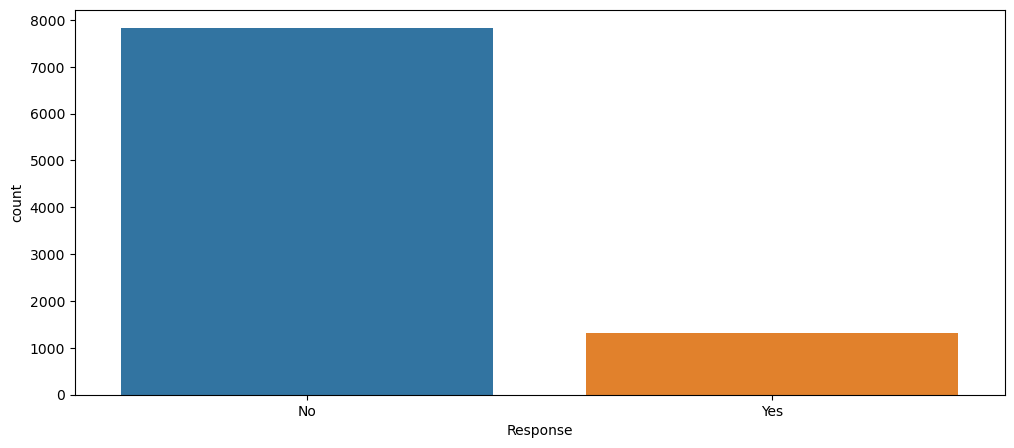

None
No     7826
Yes    1308
Name: Response, dtype: int64
Axes(0.125,0.11;0.775x0.77)


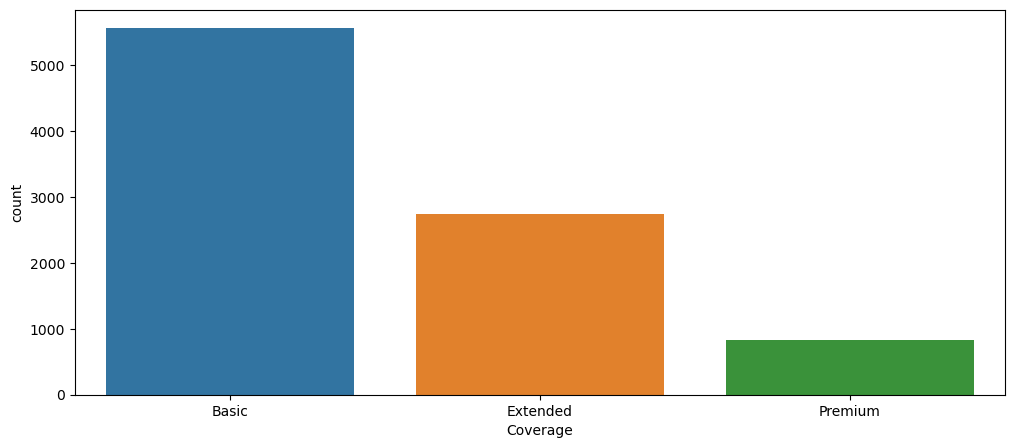

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Axes(0.125,0.11;0.775x0.77)


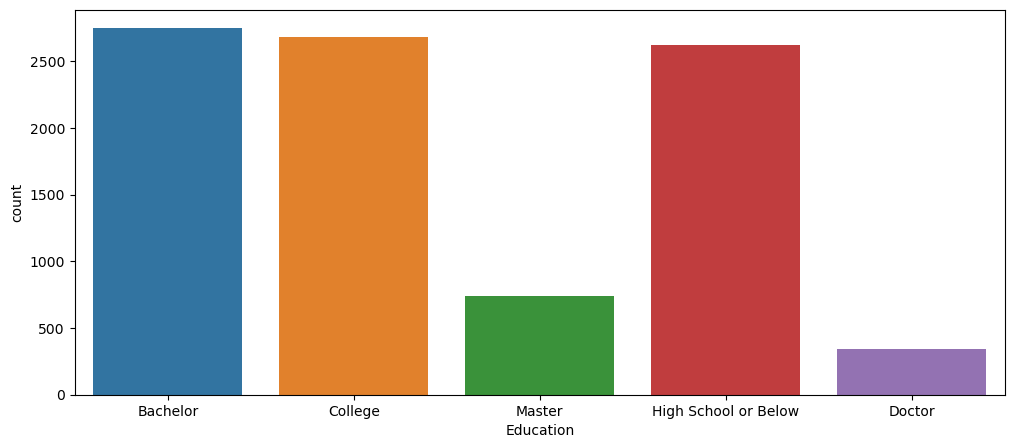

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Axes(0.125,0.11;0.775x0.77)


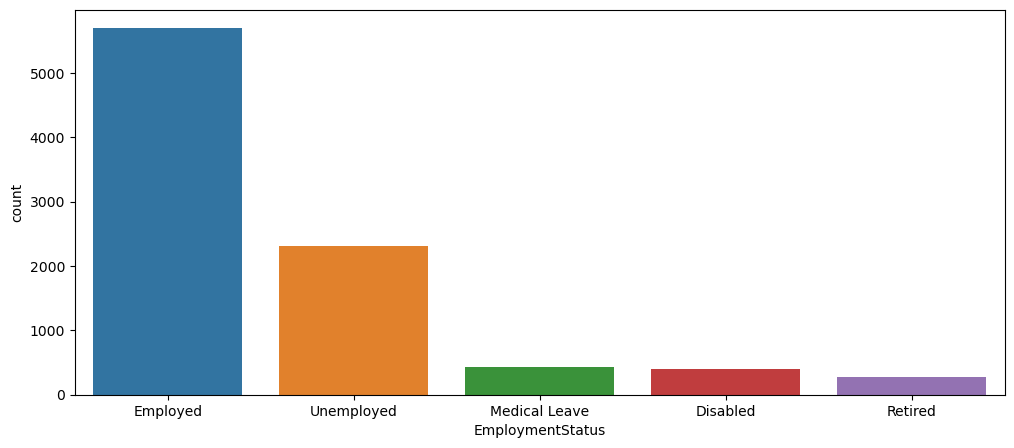

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
Axes(0.125,0.11;0.775x0.77)


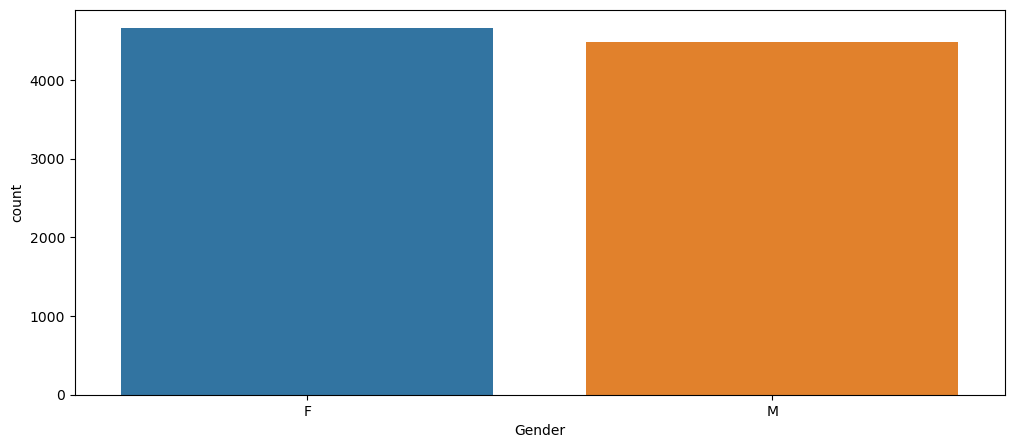

None
F    4658
M    4476
Name: Gender, dtype: int64
Axes(0.125,0.11;0.775x0.77)


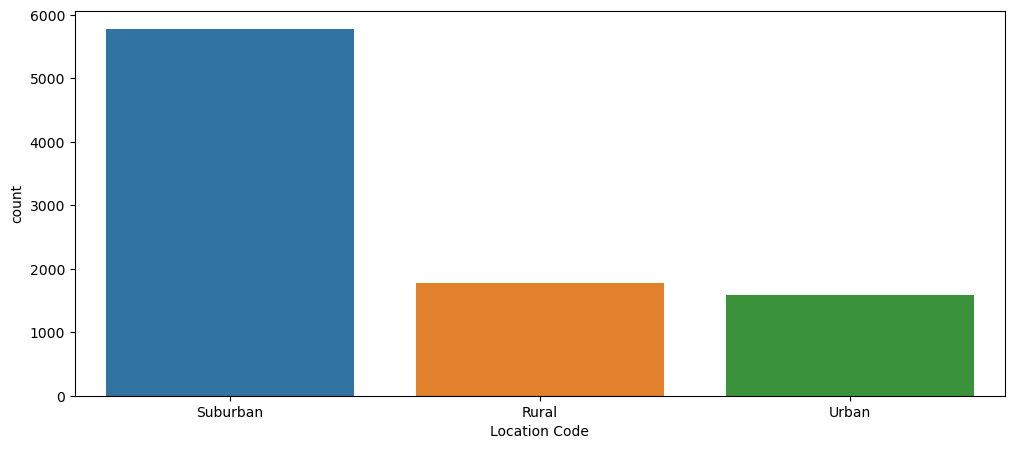

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Axes(0.125,0.11;0.775x0.77)


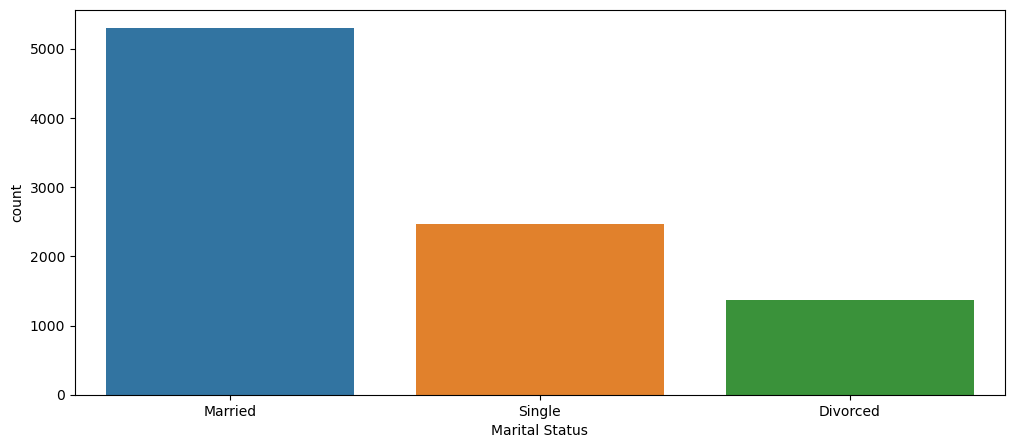

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Axes(0.125,0.11;0.775x0.77)


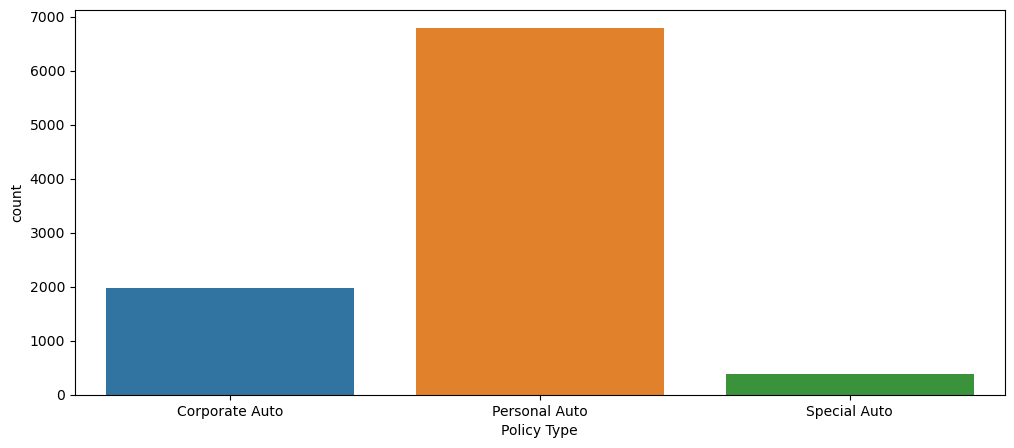

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


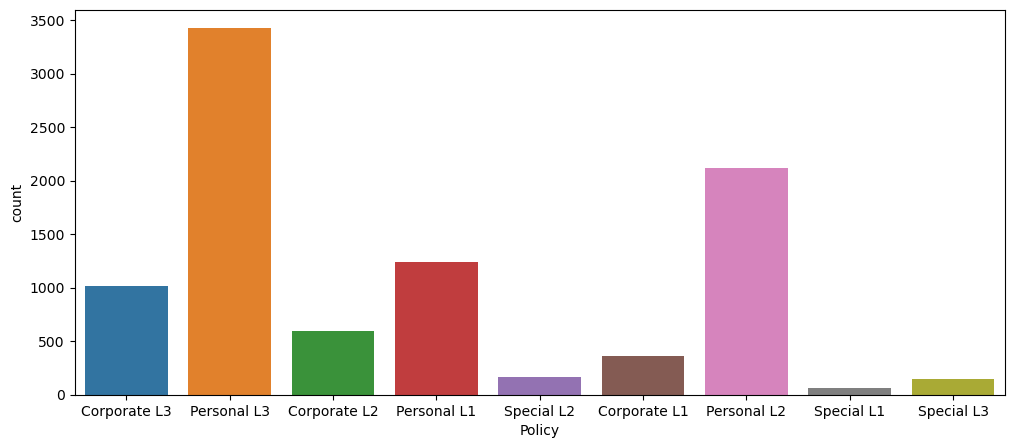

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
Axes(0.125,0.11;0.775x0.77)


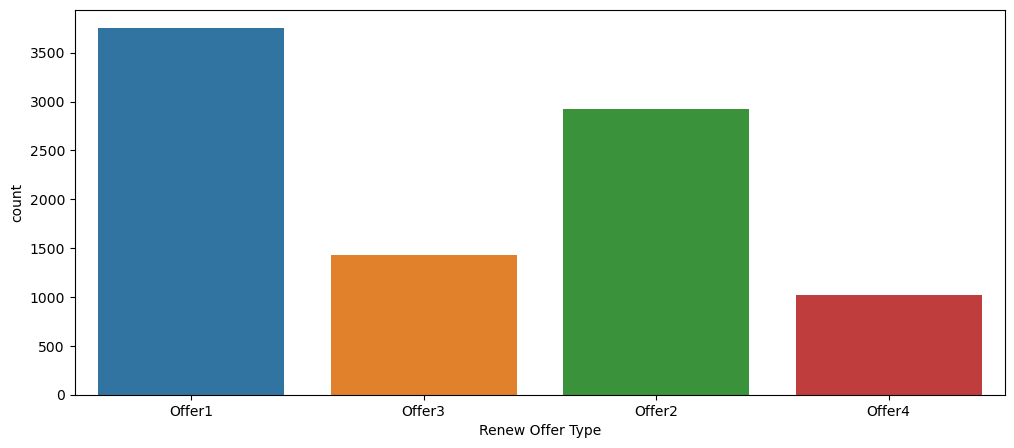

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


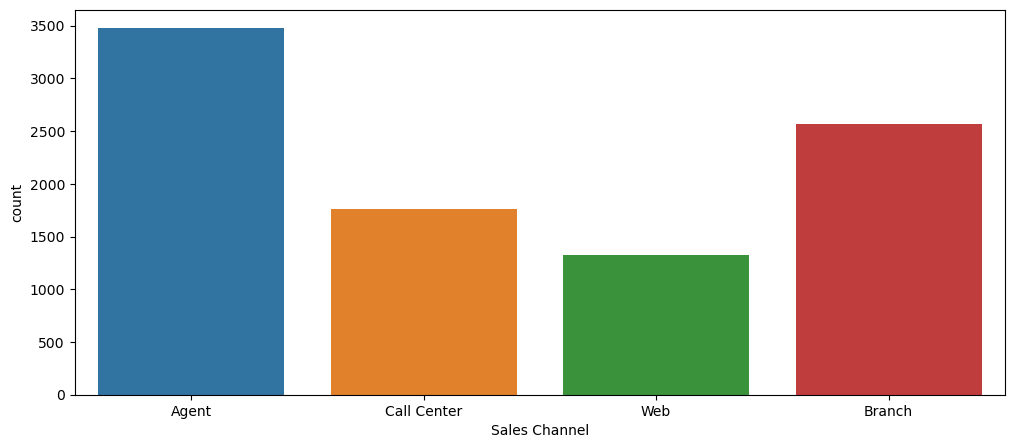

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
Axes(0.125,0.11;0.775x0.77)


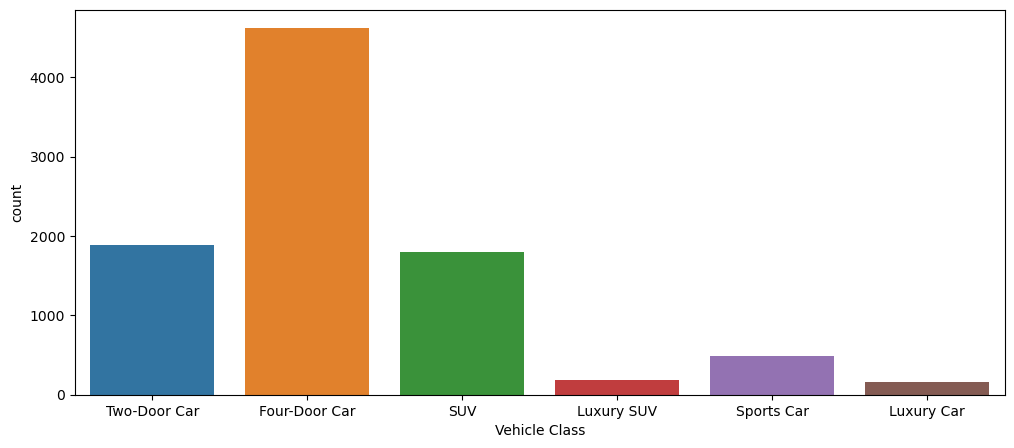

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
Axes(0.125,0.11;0.775x0.77)


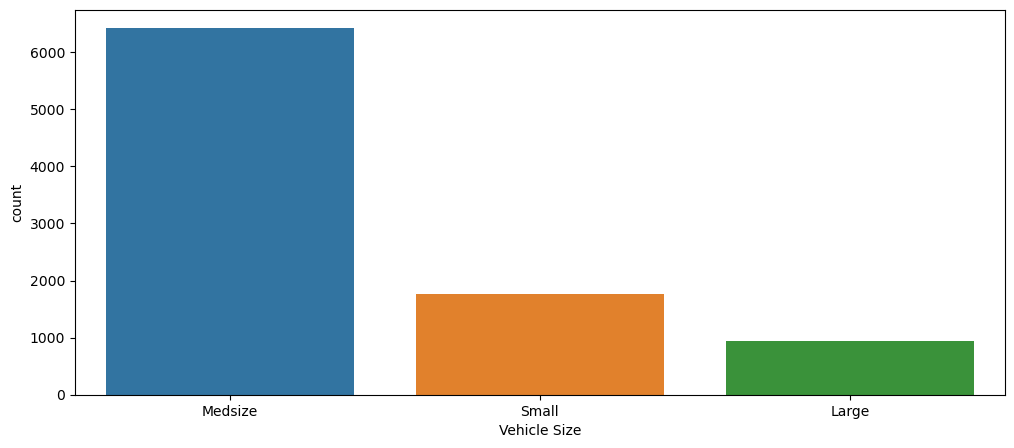

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [29]:
for i in ObjectData.columns:
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

# Bivariate Data Visualization

Axes(0.125,0.11;0.775x0.77)


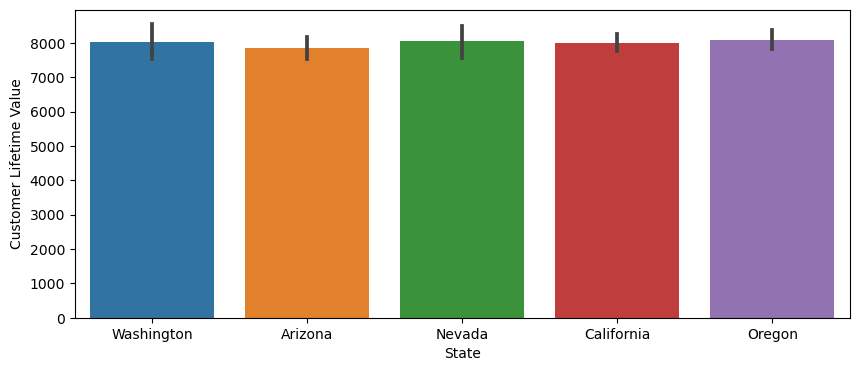

None
Axes(0.125,0.11;0.775x0.77)


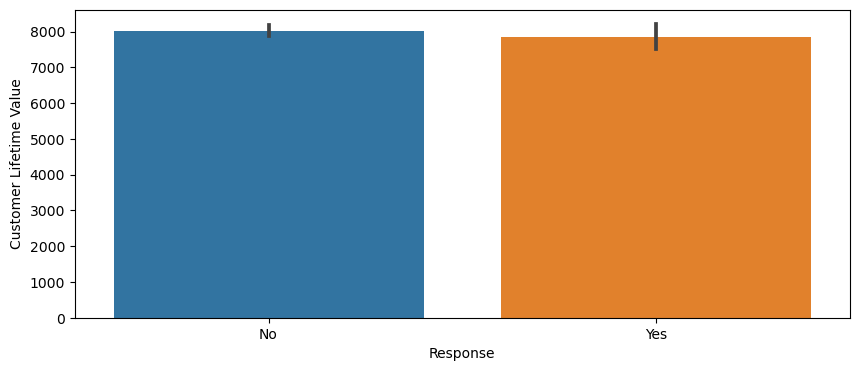

None
Axes(0.125,0.11;0.775x0.77)


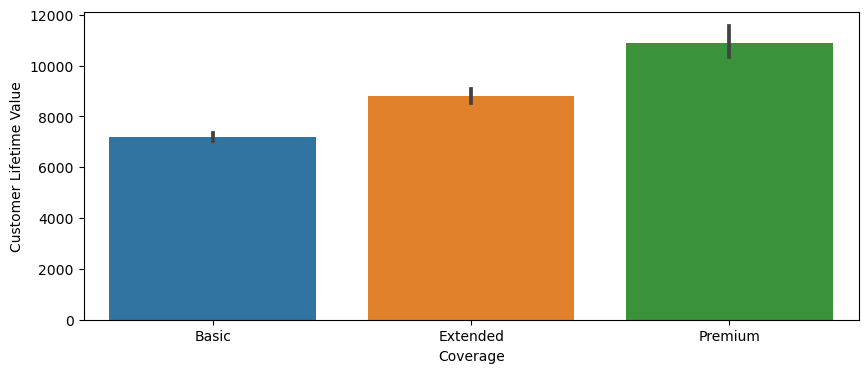

None
Axes(0.125,0.11;0.775x0.77)


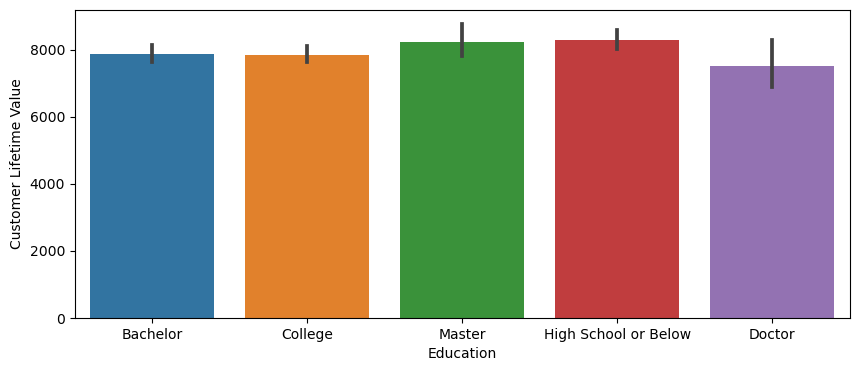

None
Axes(0.125,0.11;0.775x0.77)


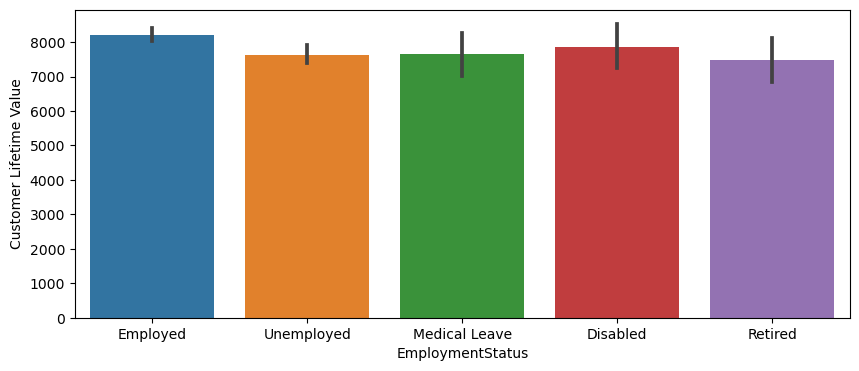

None
Axes(0.125,0.11;0.775x0.77)


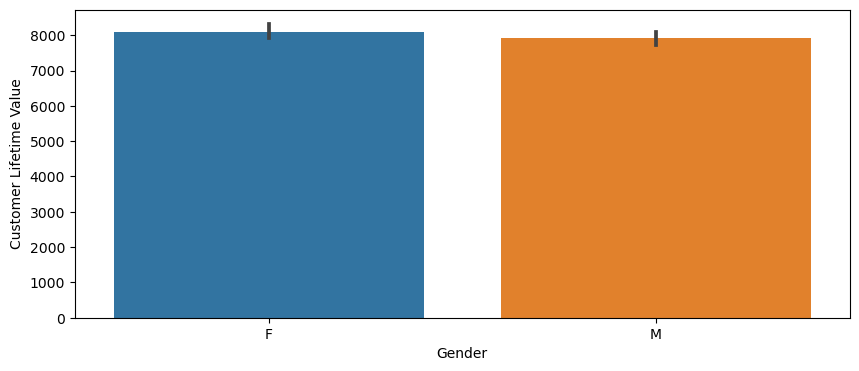

None
Axes(0.125,0.11;0.775x0.77)


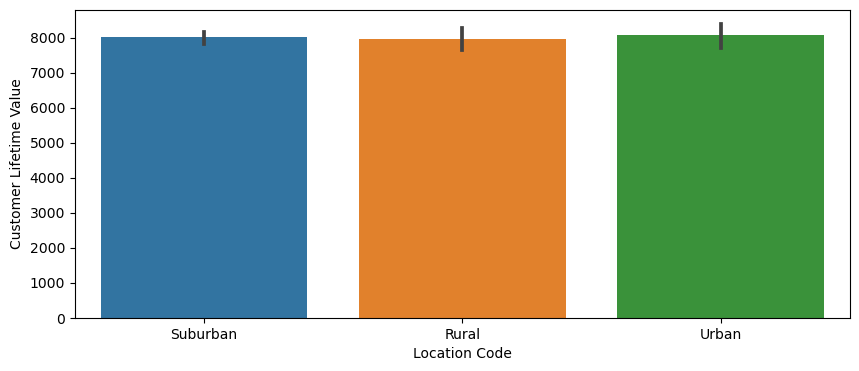

None
Axes(0.125,0.11;0.775x0.77)


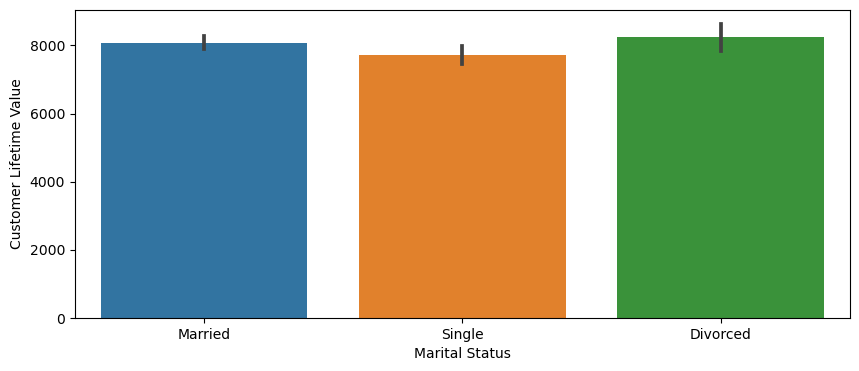

None
Axes(0.125,0.11;0.775x0.77)


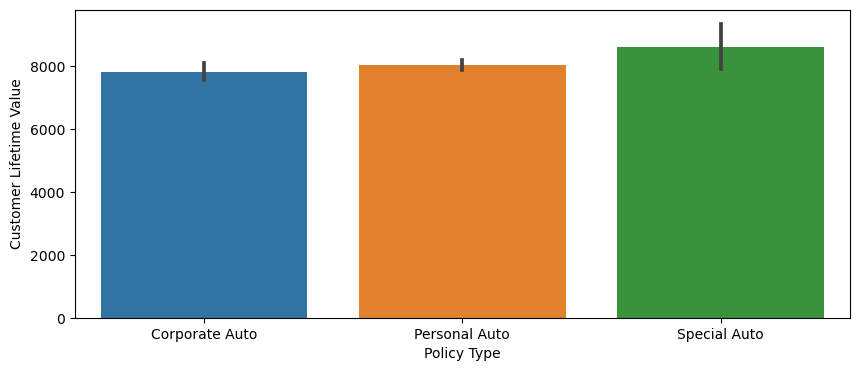

None
Axes(0.125,0.11;0.775x0.77)


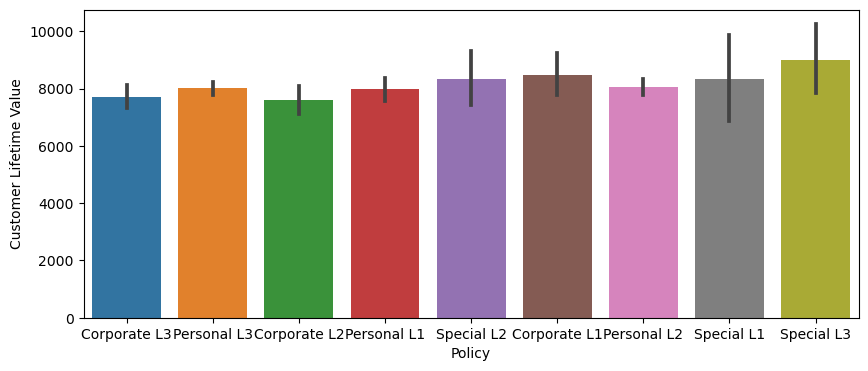

None
Axes(0.125,0.11;0.775x0.77)


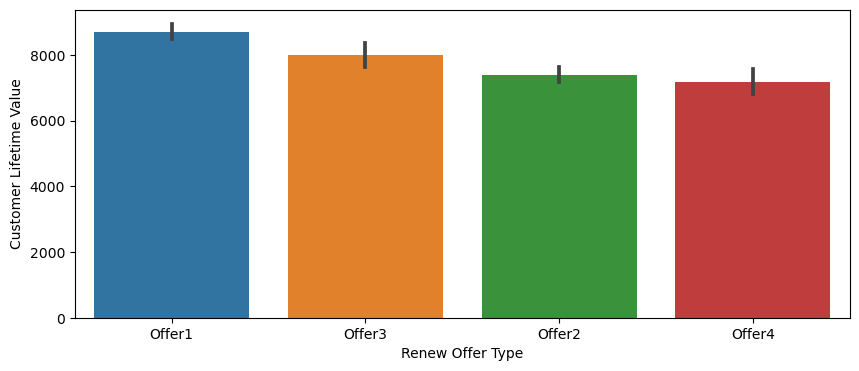

None
Axes(0.125,0.11;0.775x0.77)


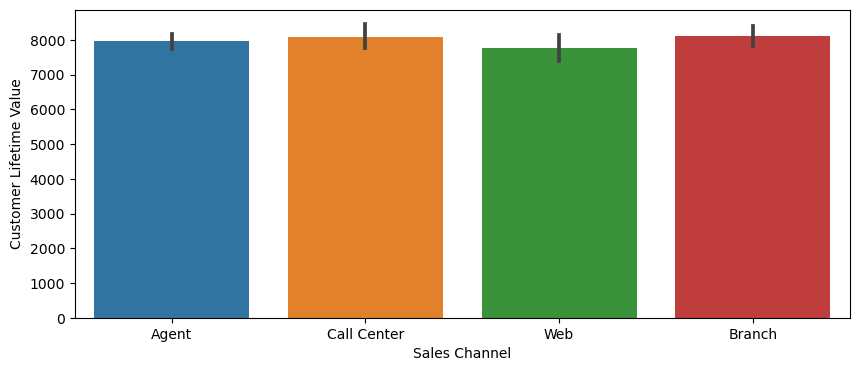

None
Axes(0.125,0.11;0.775x0.77)


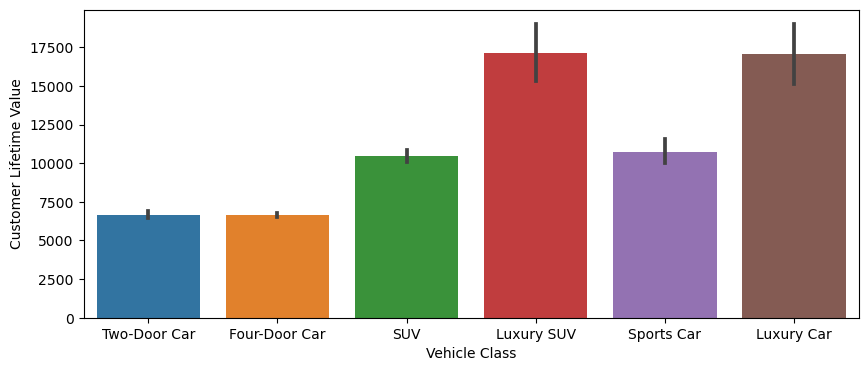

None
Axes(0.125,0.11;0.775x0.77)


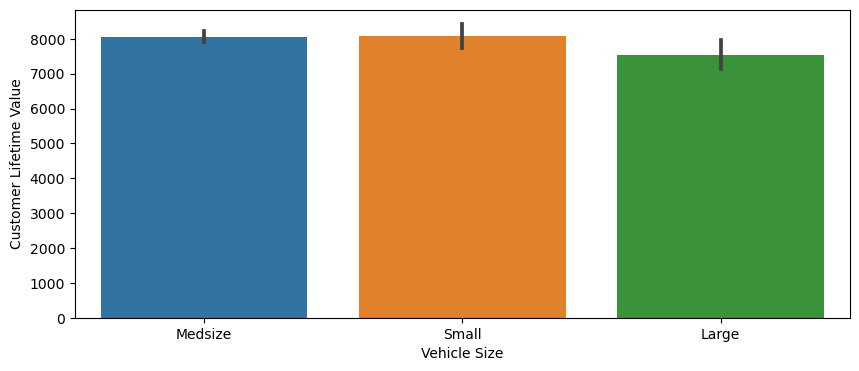

None


In [30]:
for i in ObjectData.columns:
    plt.figure(figsize=(10, 4))
    print(sns.barplot(x=ObjectData[i],y=df['Customer Lifetime Value'], data=ObjectData))
    print(plt.show())

Axes(0.125,0.11;0.775x0.77)


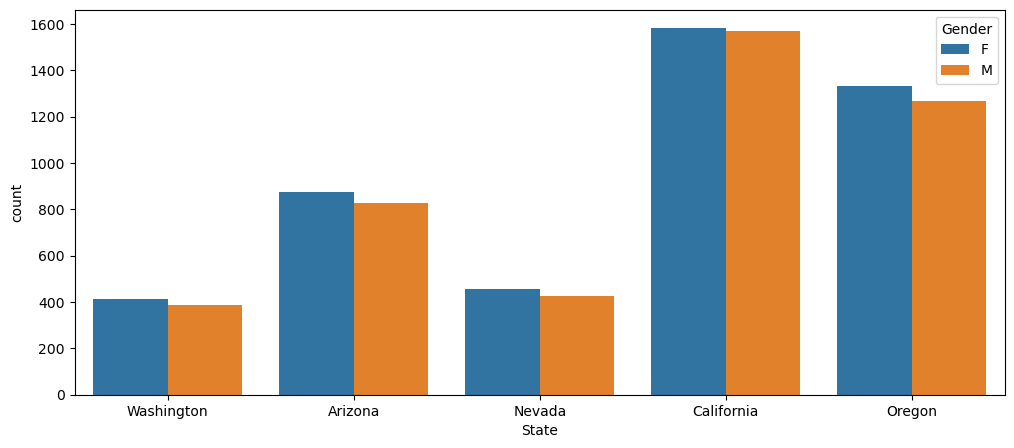

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
Axes(0.125,0.11;0.775x0.77)


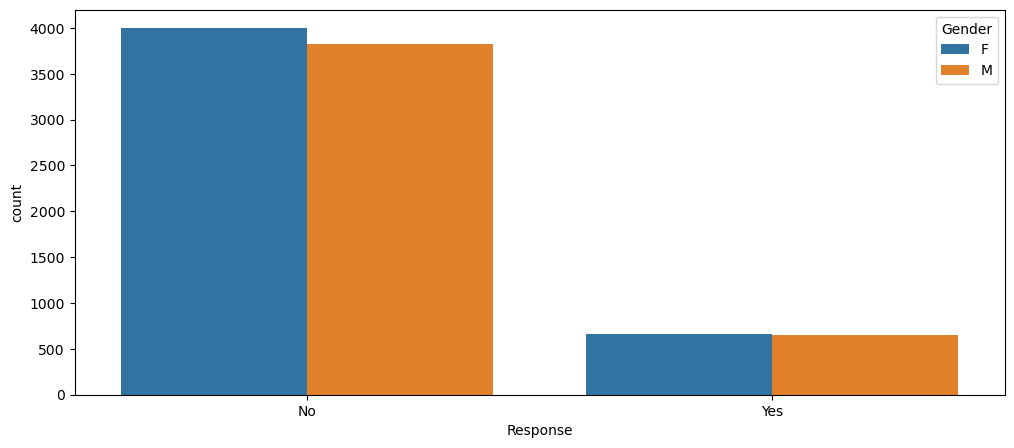

None
No     7826
Yes    1308
Name: Response, dtype: int64
Axes(0.125,0.11;0.775x0.77)


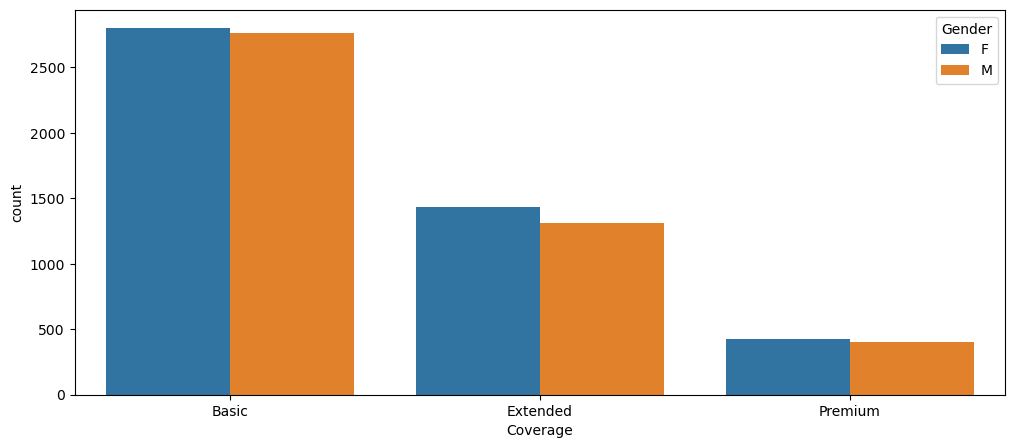

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Axes(0.125,0.11;0.775x0.77)


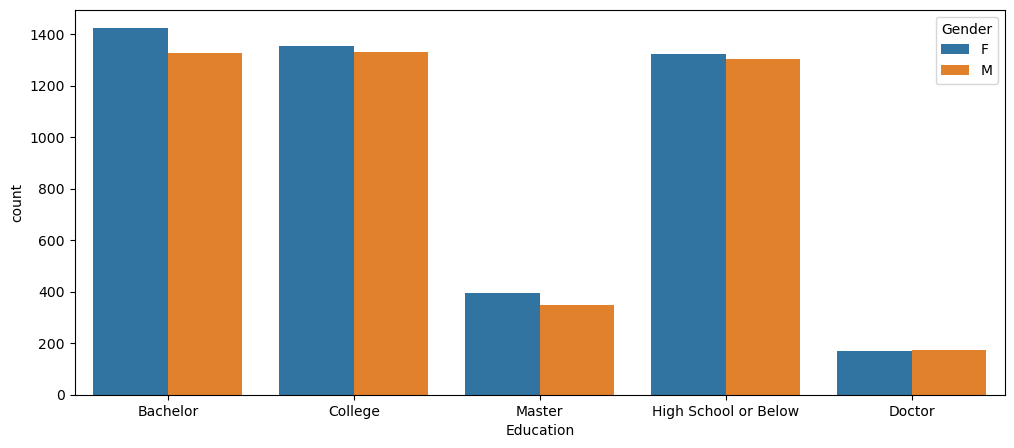

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Axes(0.125,0.11;0.775x0.77)


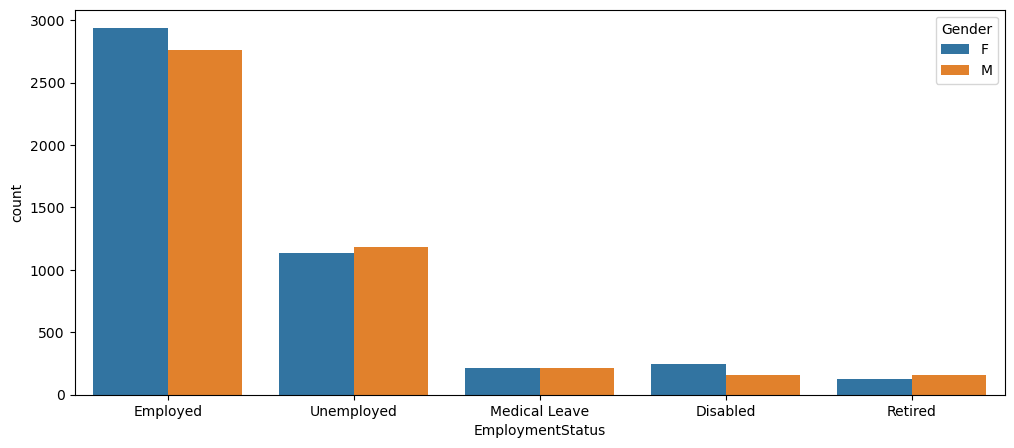

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
Axes(0.125,0.11;0.775x0.77)


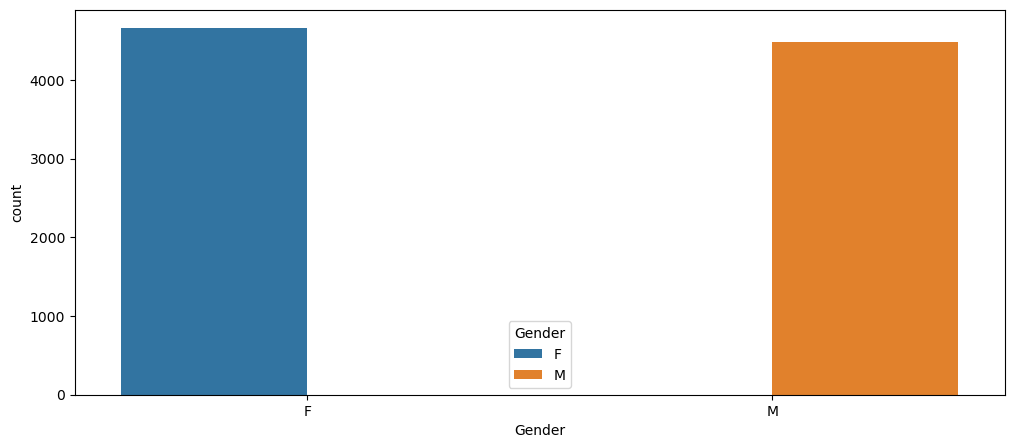

None
F    4658
M    4476
Name: Gender, dtype: int64
Axes(0.125,0.11;0.775x0.77)


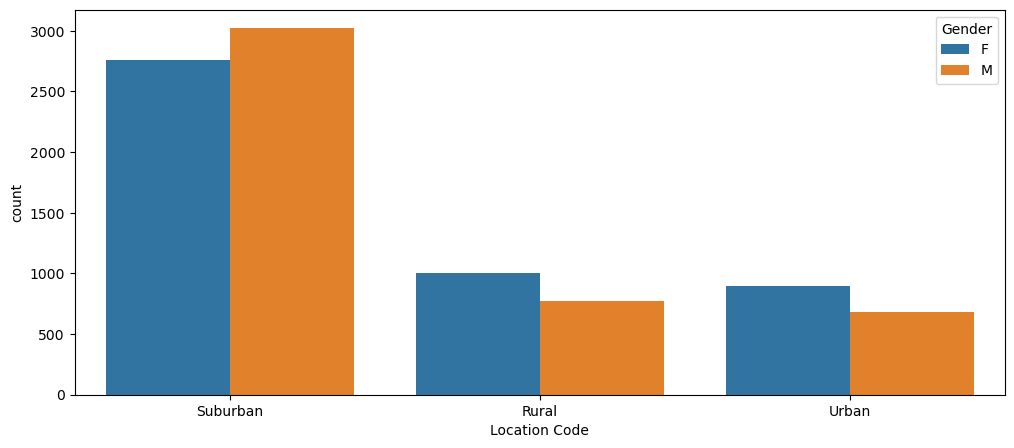

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Axes(0.125,0.11;0.775x0.77)


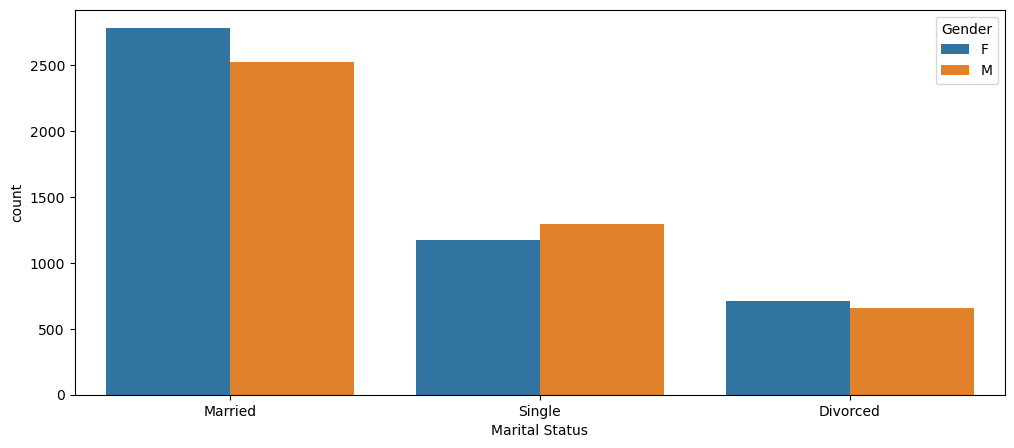

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Axes(0.125,0.11;0.775x0.77)


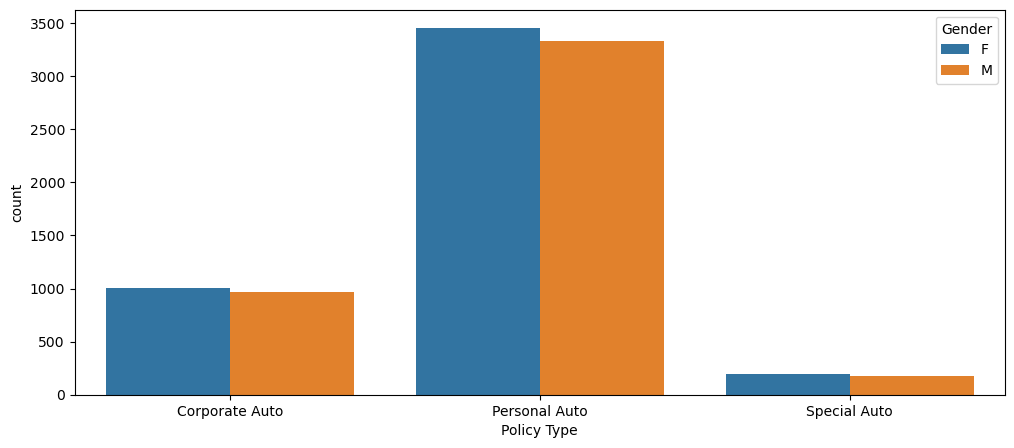

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


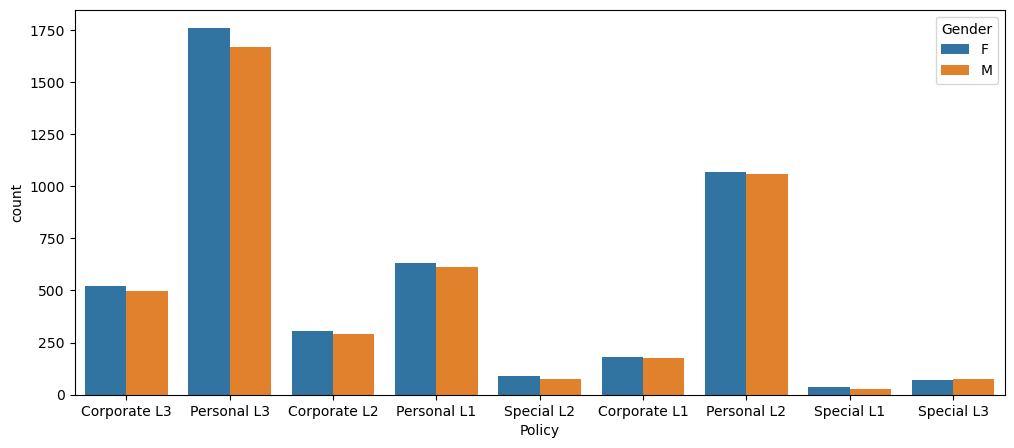

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
Axes(0.125,0.11;0.775x0.77)


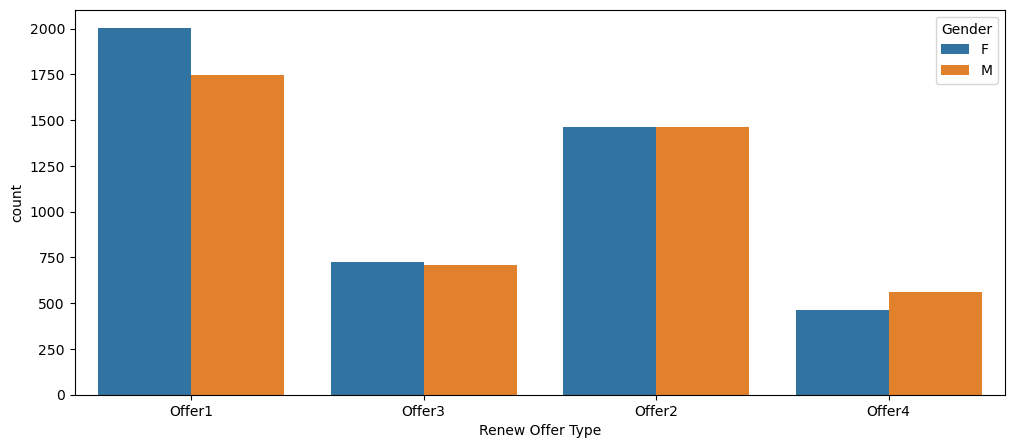

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


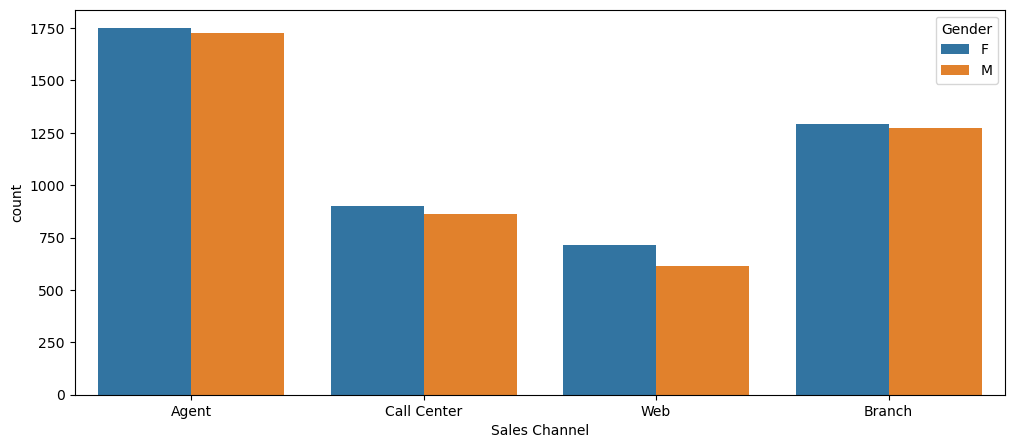

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
Axes(0.125,0.11;0.775x0.77)


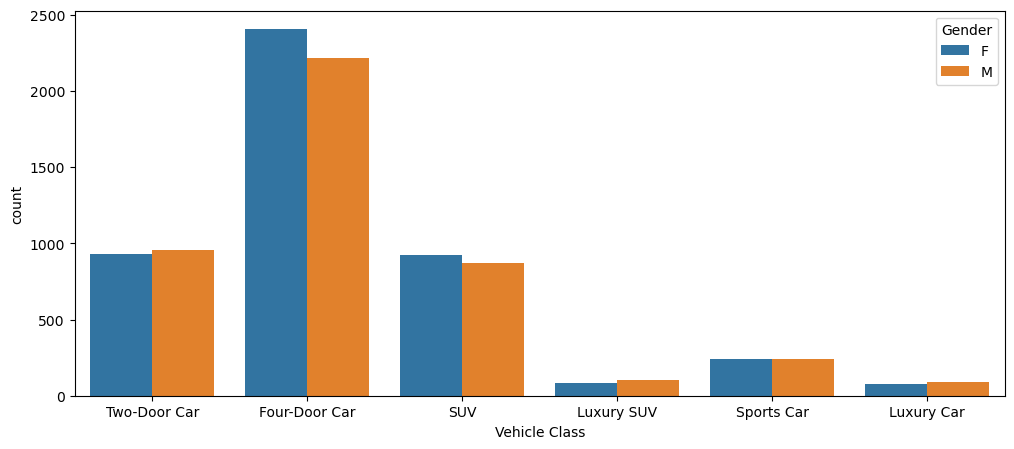

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
Axes(0.125,0.11;0.775x0.77)


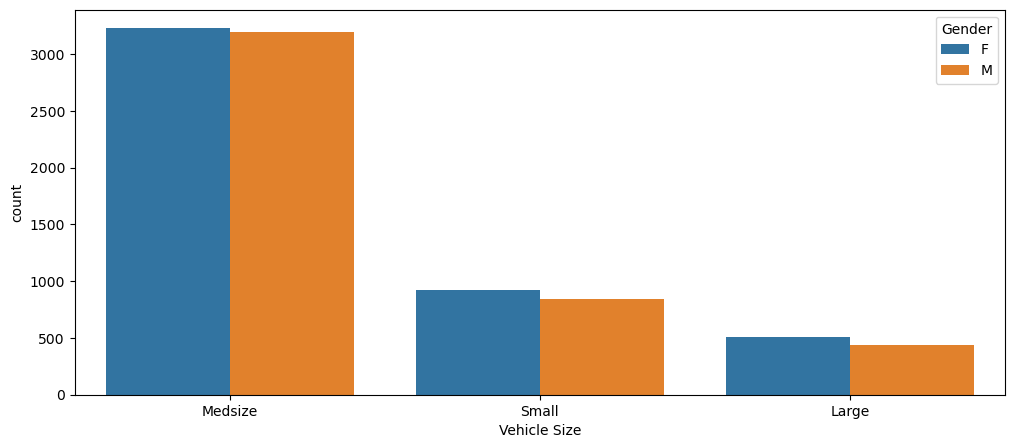

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [31]:
for i in ObjectData.columns:
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],hue=ObjectData['Gender'],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

Axes(0.125,0.11;0.775x0.77)


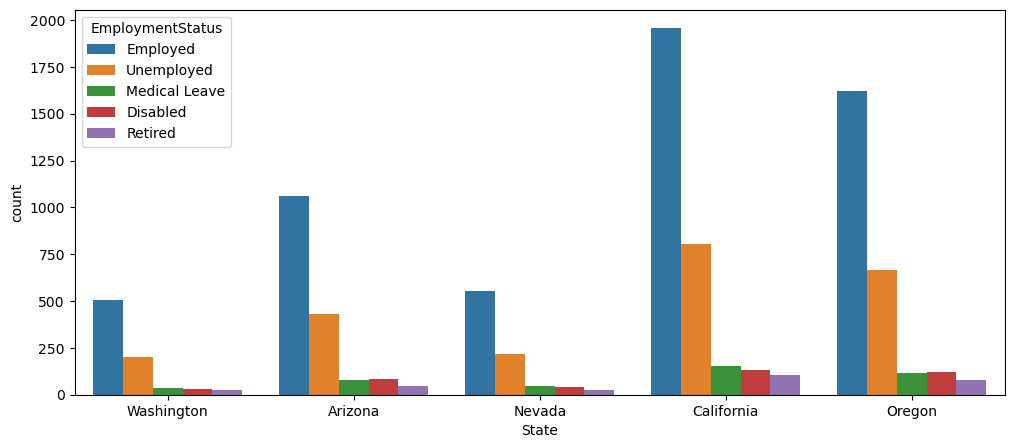

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
Axes(0.125,0.11;0.775x0.77)


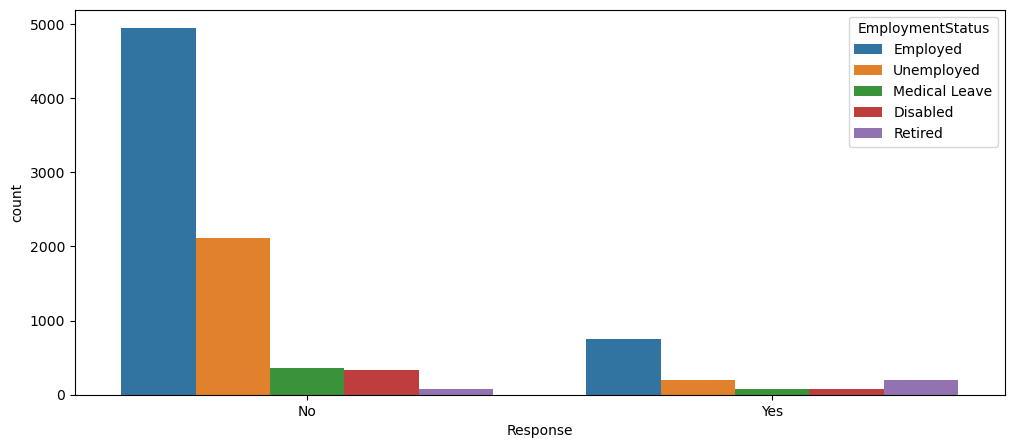

None
No     7826
Yes    1308
Name: Response, dtype: int64
Axes(0.125,0.11;0.775x0.77)


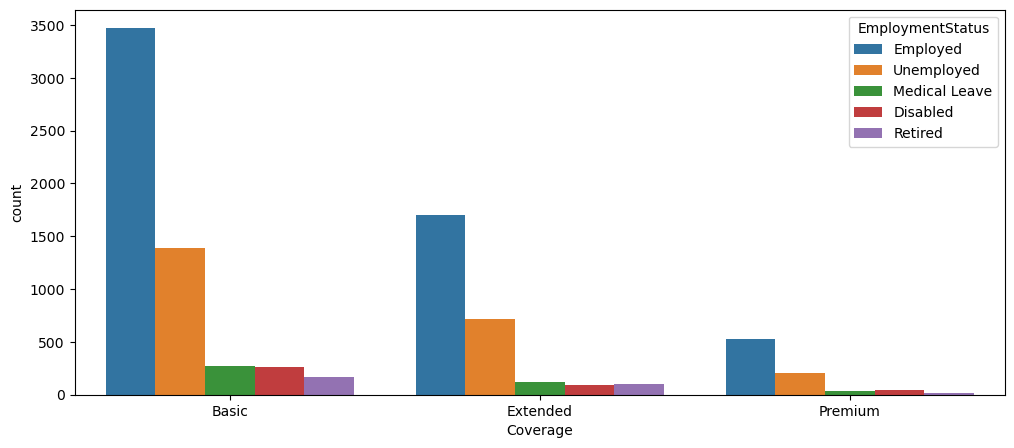

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Axes(0.125,0.11;0.775x0.77)


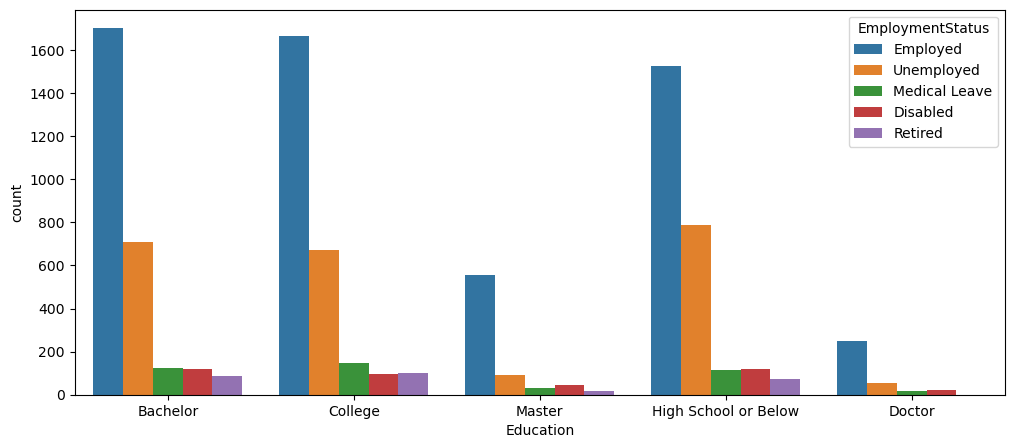

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Axes(0.125,0.11;0.775x0.77)


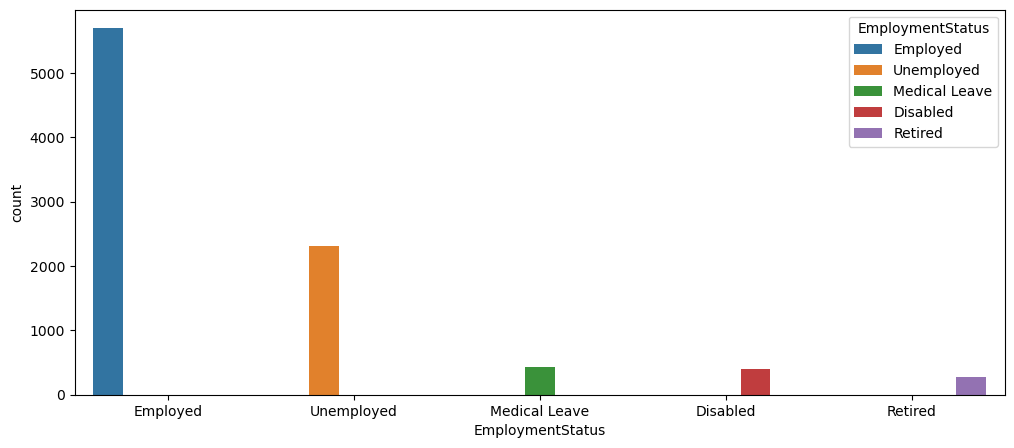

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
Axes(0.125,0.11;0.775x0.77)


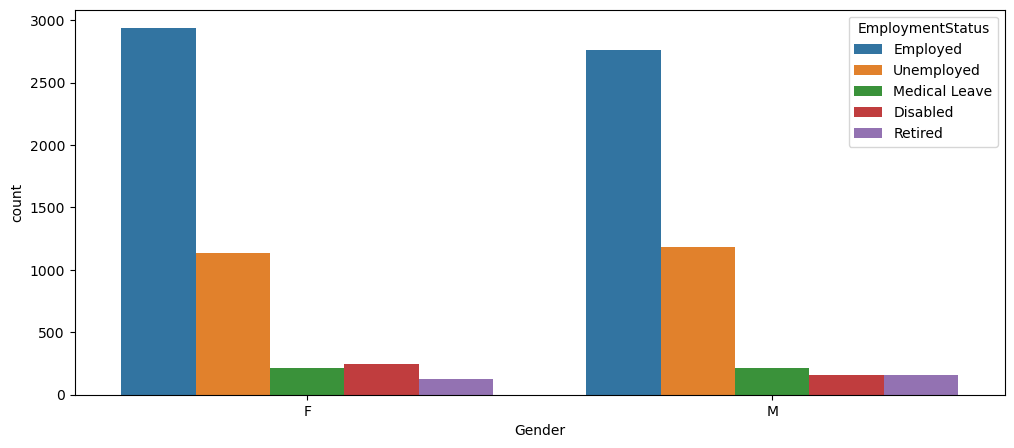

None
F    4658
M    4476
Name: Gender, dtype: int64
Axes(0.125,0.11;0.775x0.77)


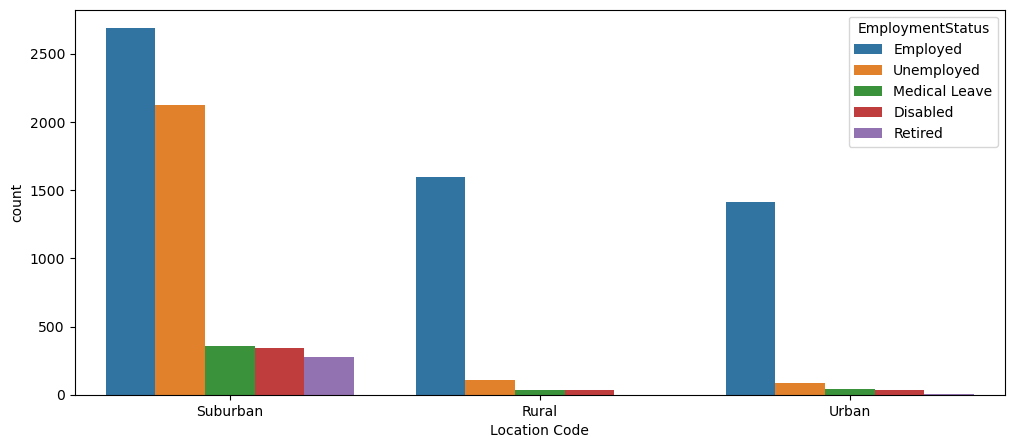

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Axes(0.125,0.11;0.775x0.77)


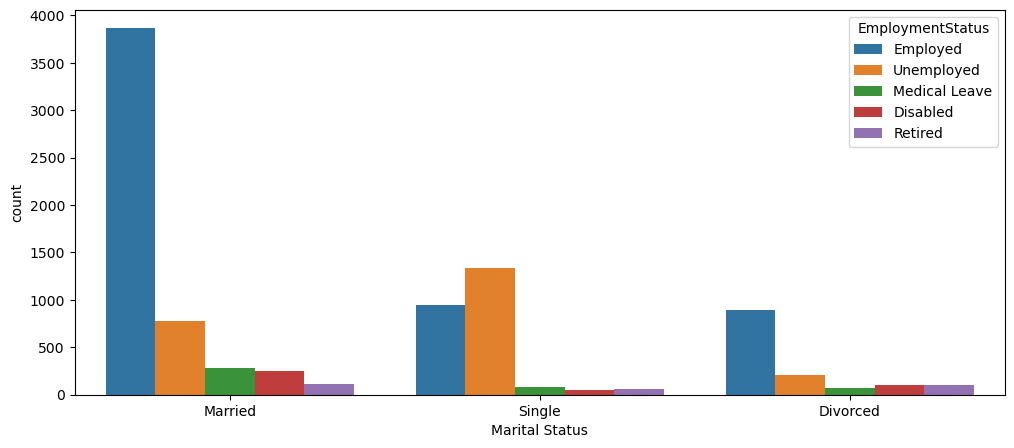

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Axes(0.125,0.11;0.775x0.77)


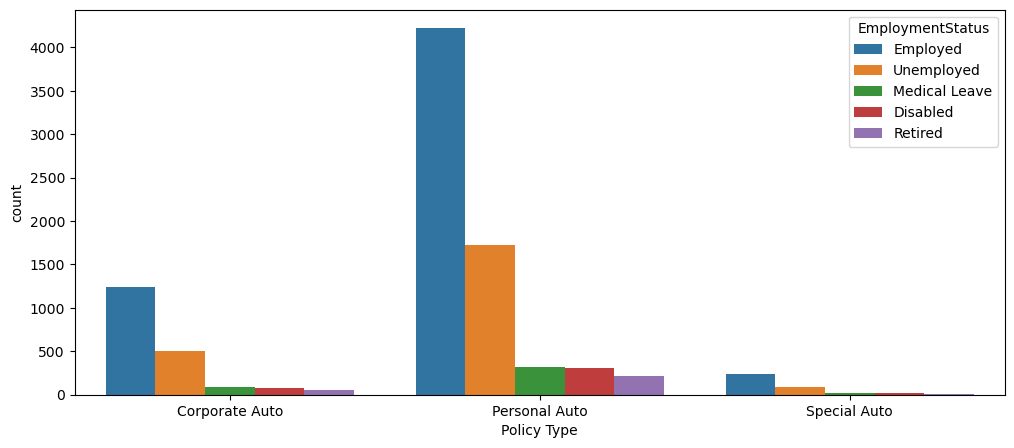

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


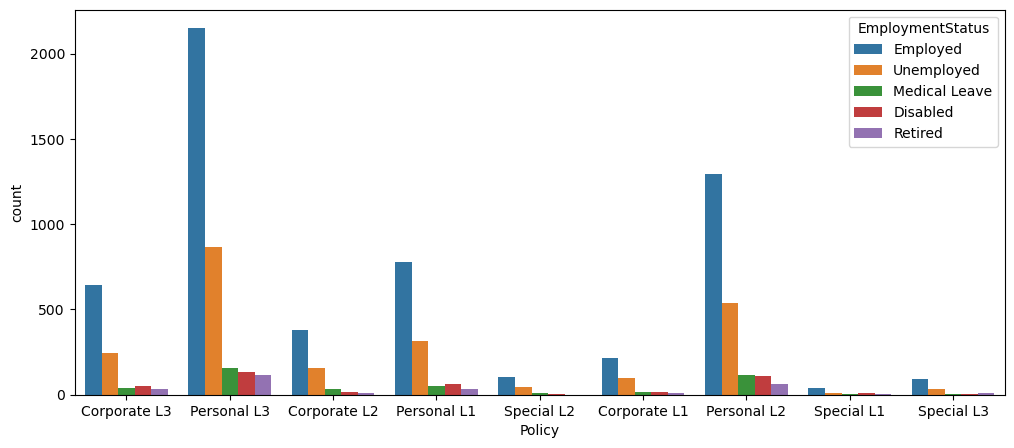

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
Axes(0.125,0.11;0.775x0.77)


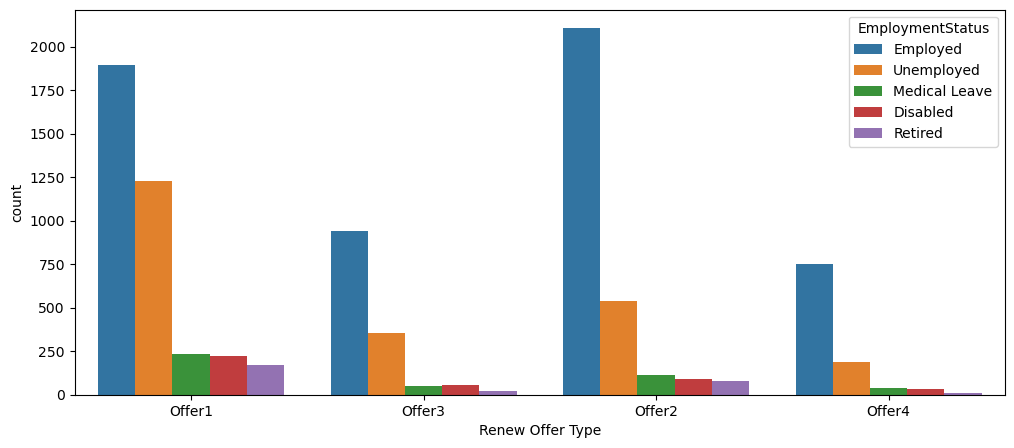

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


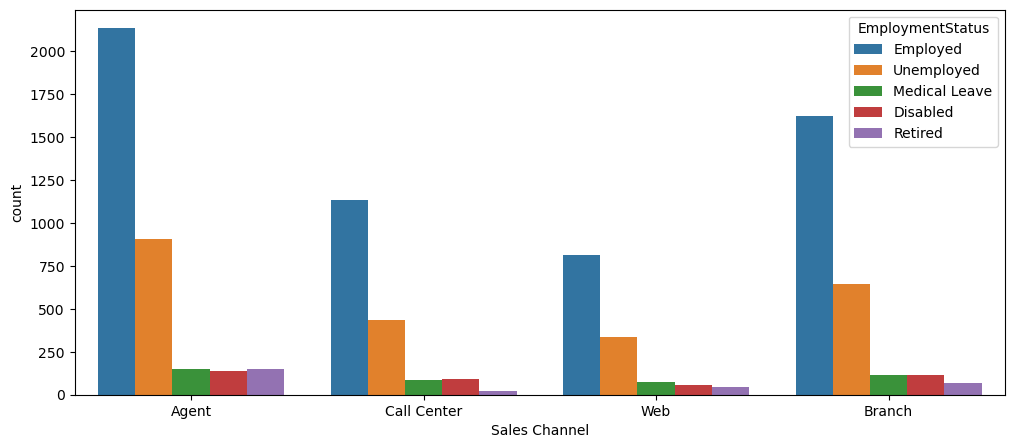

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
Axes(0.125,0.11;0.775x0.77)


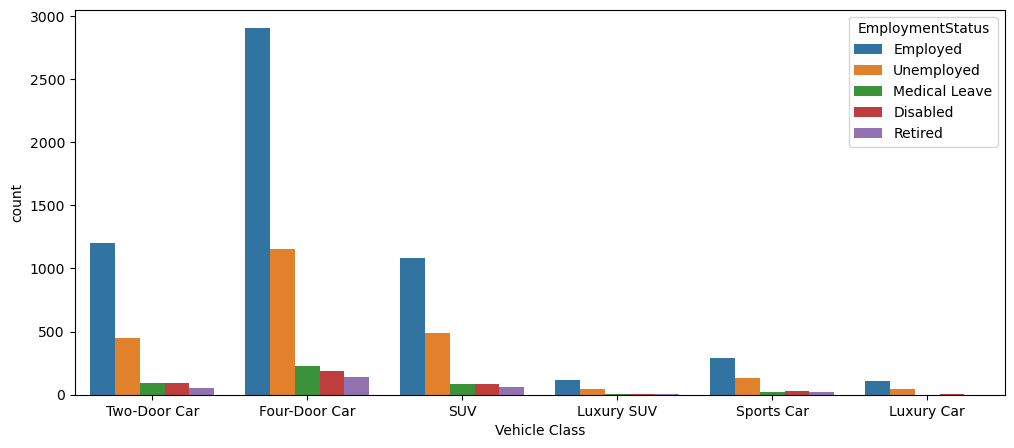

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
Axes(0.125,0.11;0.775x0.77)


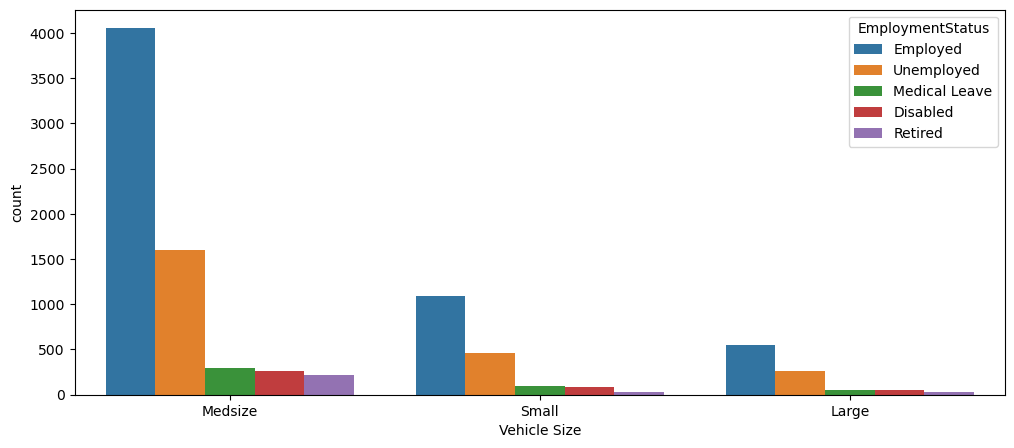

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [32]:
for i in ObjectData.columns:
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],hue=ObjectData['EmploymentStatus'],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

Axes(0.125,0.11;0.775x0.77)


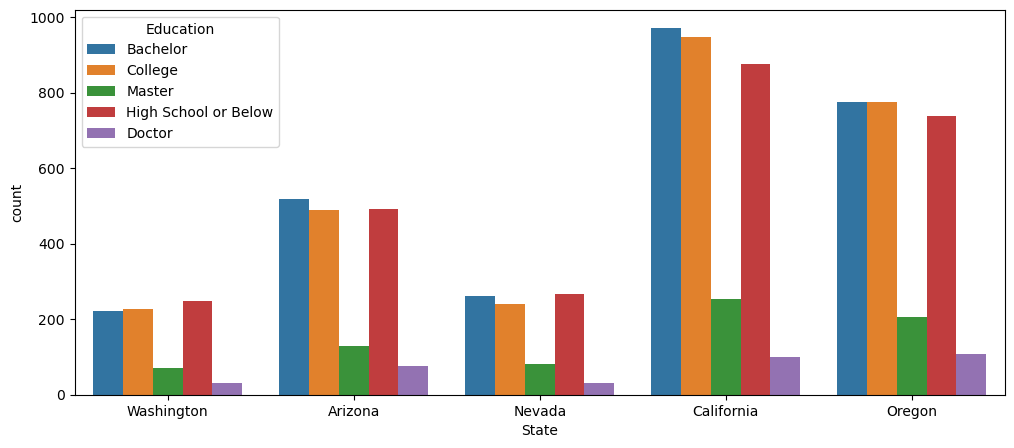

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
Axes(0.125,0.11;0.775x0.77)


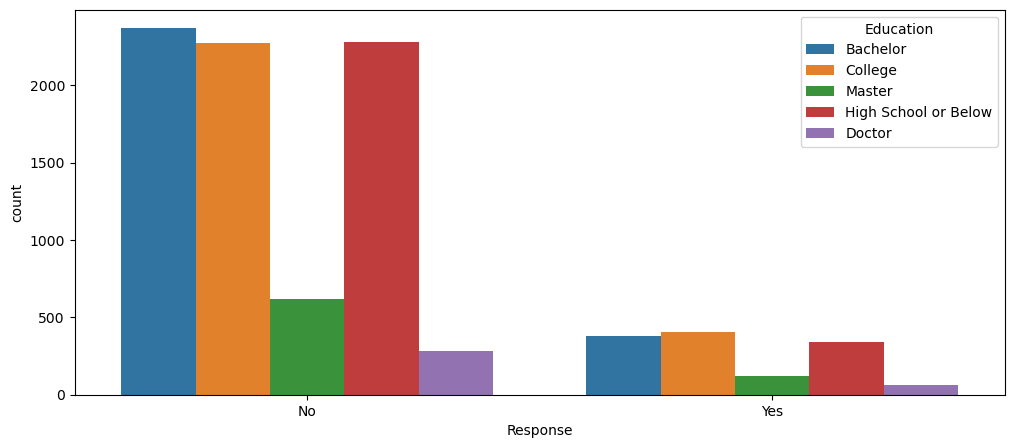

None
No     7826
Yes    1308
Name: Response, dtype: int64
Axes(0.125,0.11;0.775x0.77)


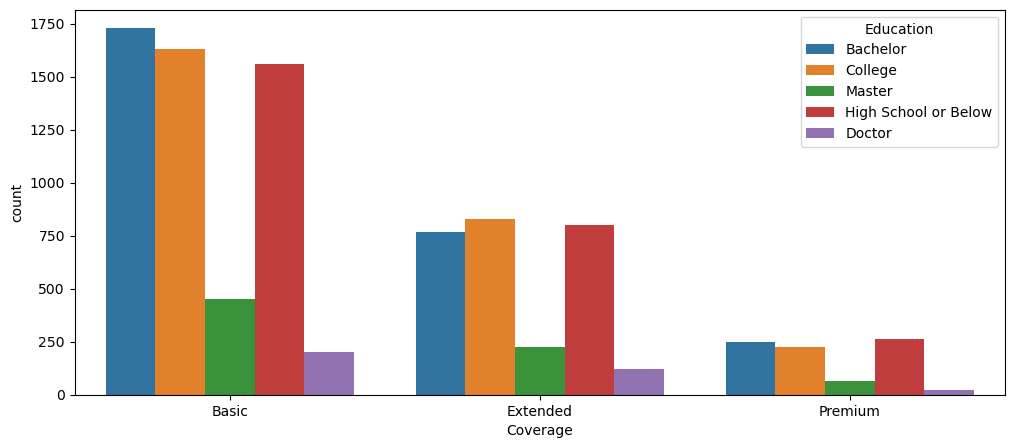

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Axes(0.125,0.11;0.775x0.77)


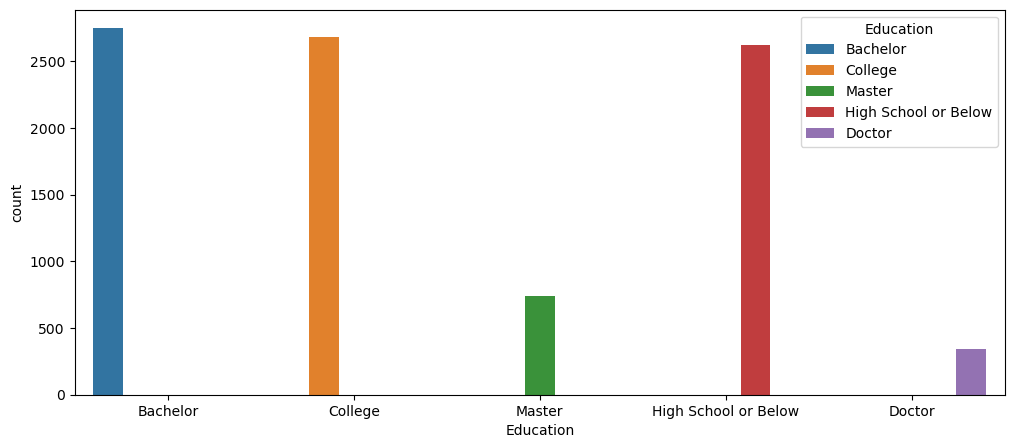

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Axes(0.125,0.11;0.775x0.77)


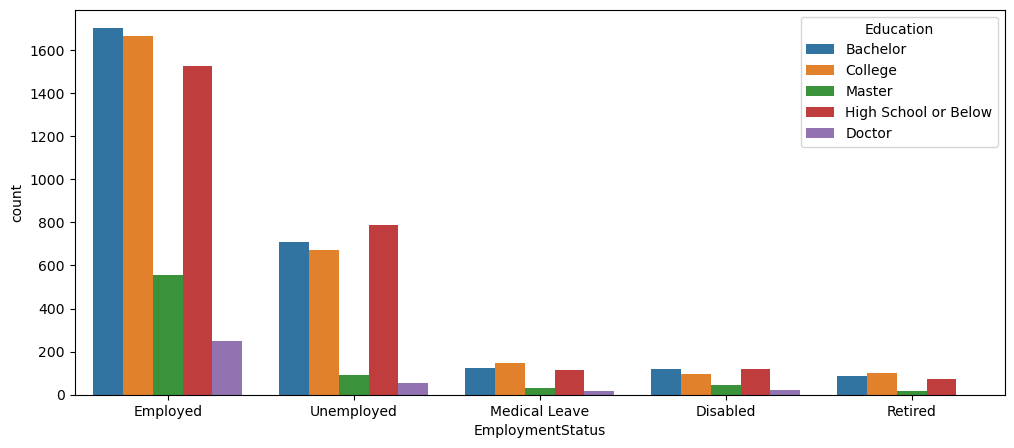

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
Axes(0.125,0.11;0.775x0.77)


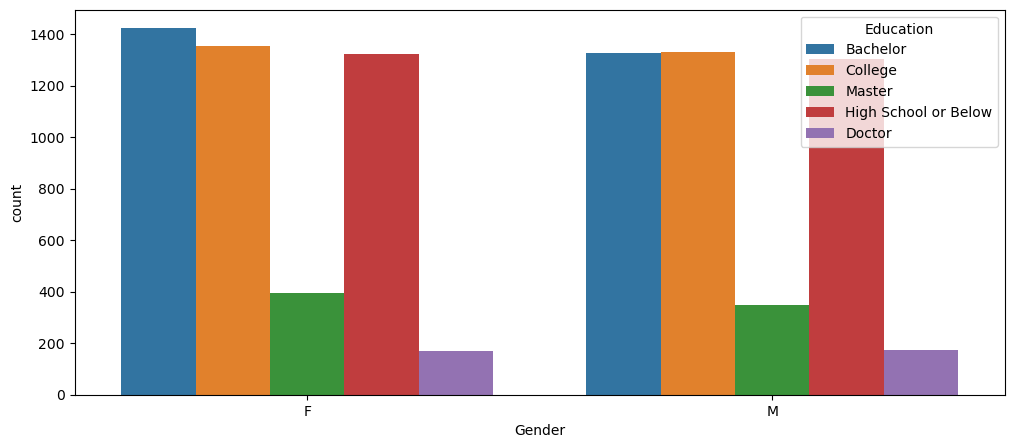

None
F    4658
M    4476
Name: Gender, dtype: int64
Axes(0.125,0.11;0.775x0.77)


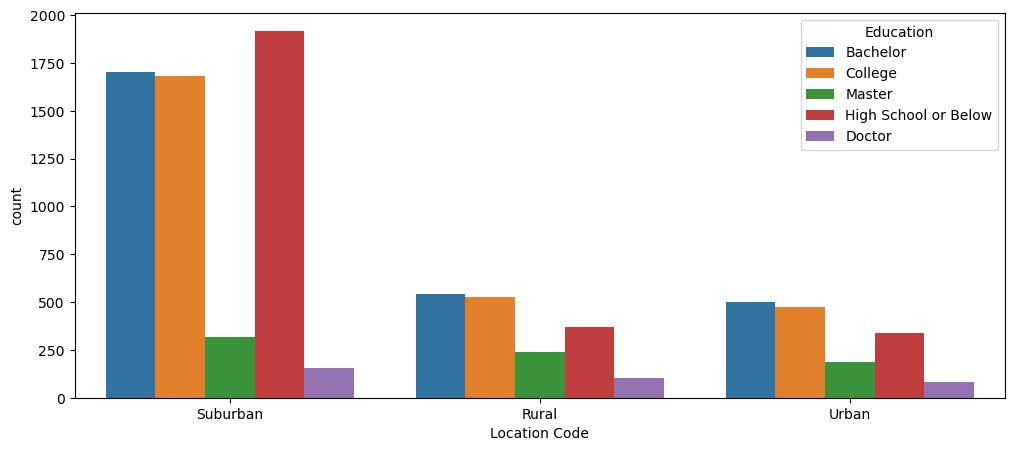

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Axes(0.125,0.11;0.775x0.77)


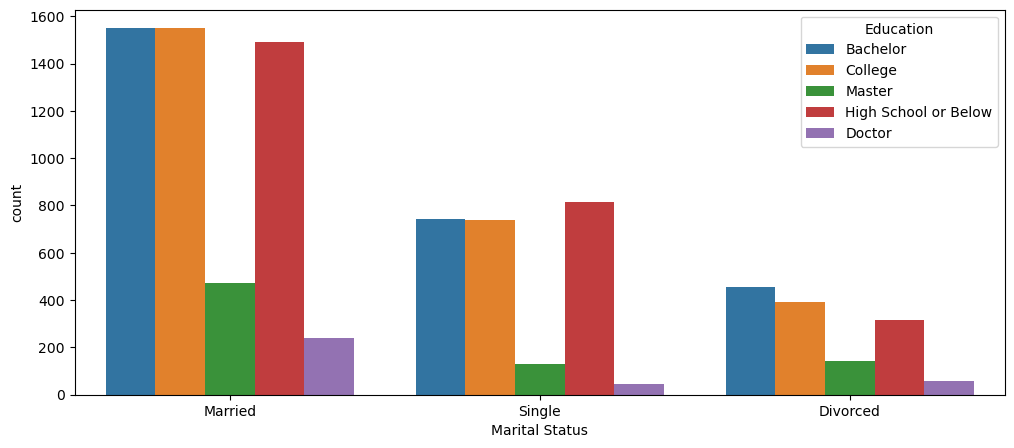

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Axes(0.125,0.11;0.775x0.77)


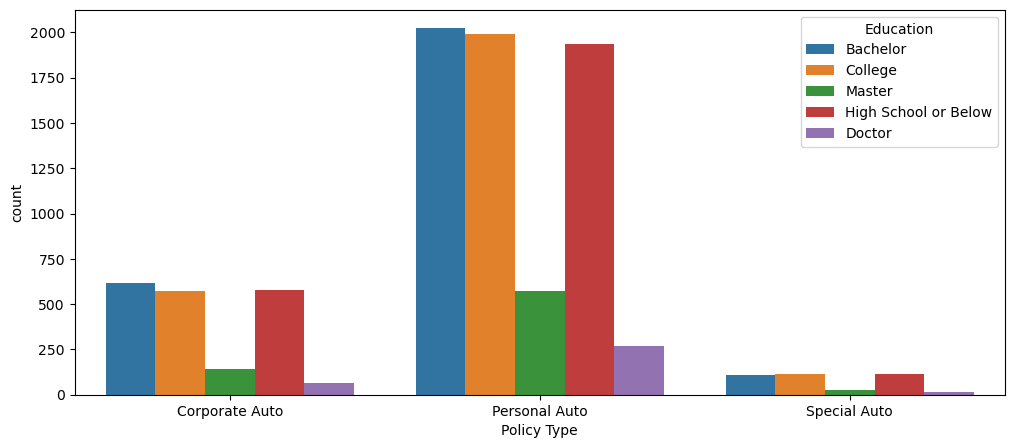

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


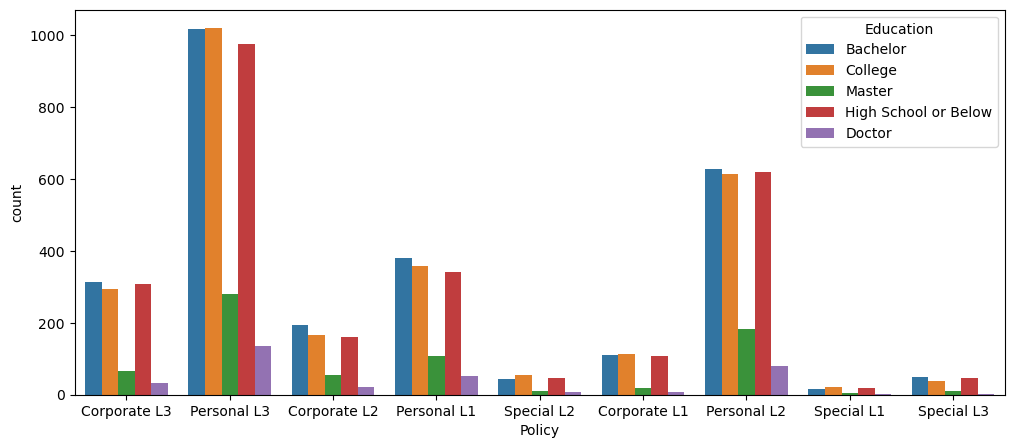

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
Axes(0.125,0.11;0.775x0.77)


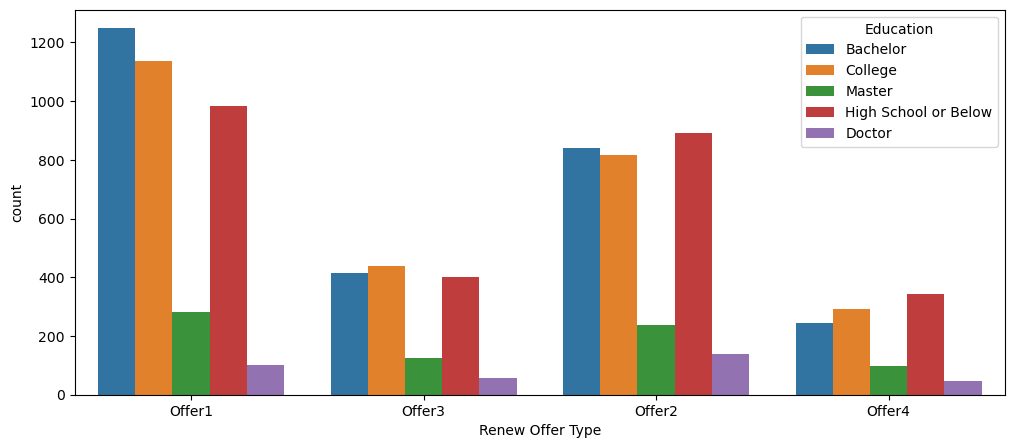

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
Axes(0.125,0.11;0.775x0.77)


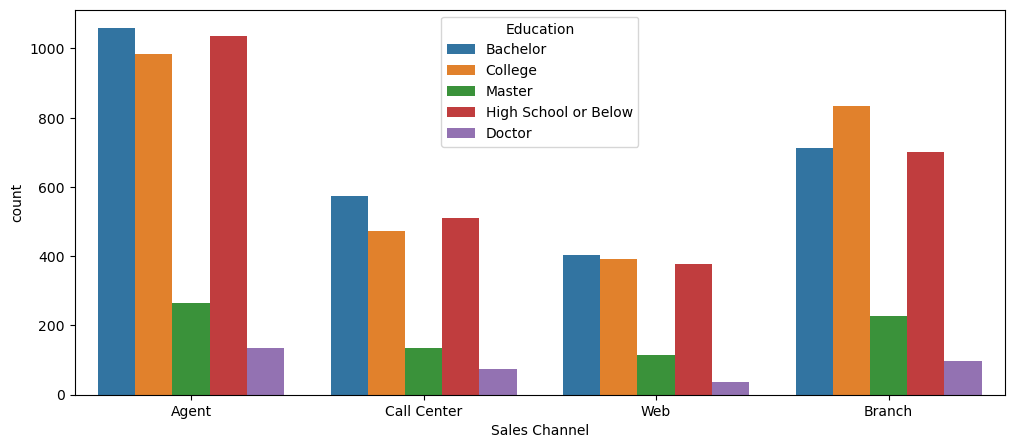

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
Axes(0.125,0.11;0.775x0.77)


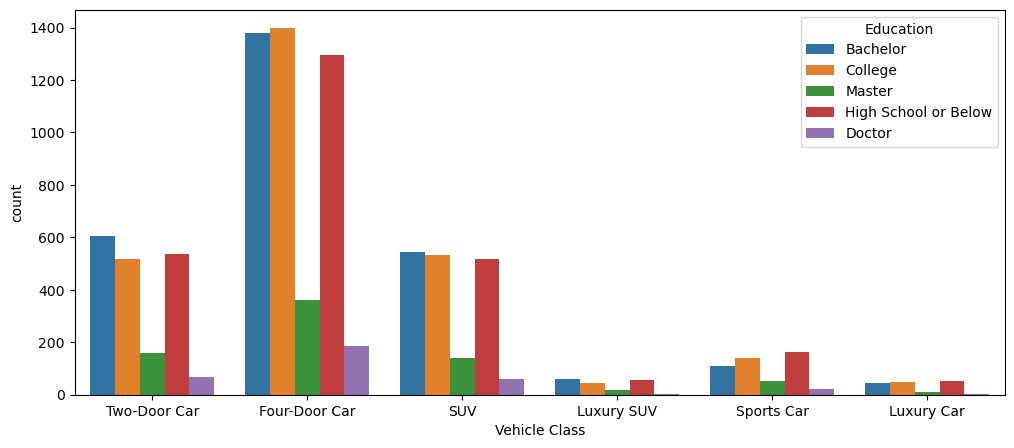

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
Axes(0.125,0.11;0.775x0.77)


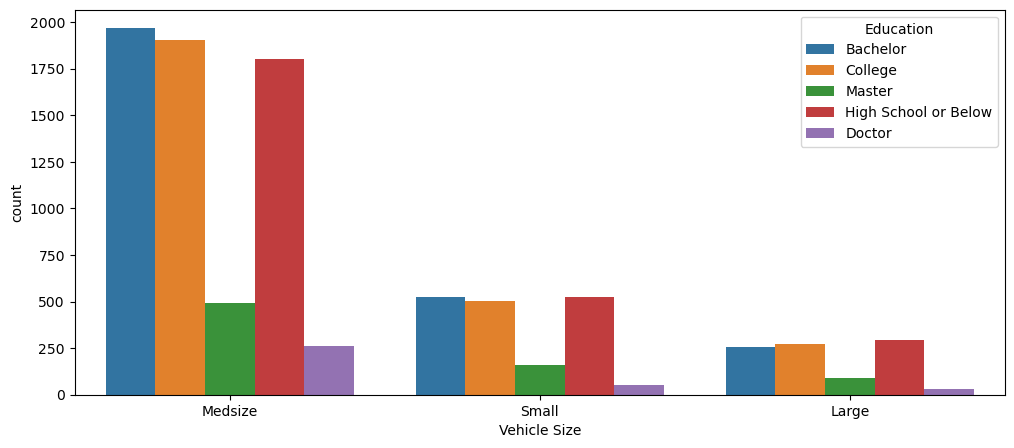

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [33]:
for i in ObjectData.columns:
    sorted(ObjectData[i])
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],hue=ObjectData['Education'],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

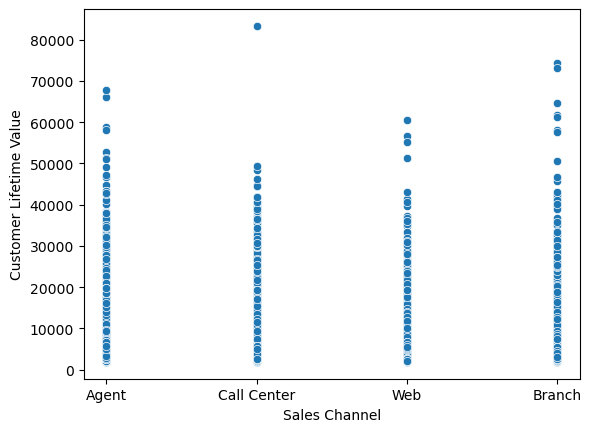

In [34]:
sns.scatterplot(x=df['Sales Channel'],y=df['Customer Lifetime Value'],data=df)
plt.show()

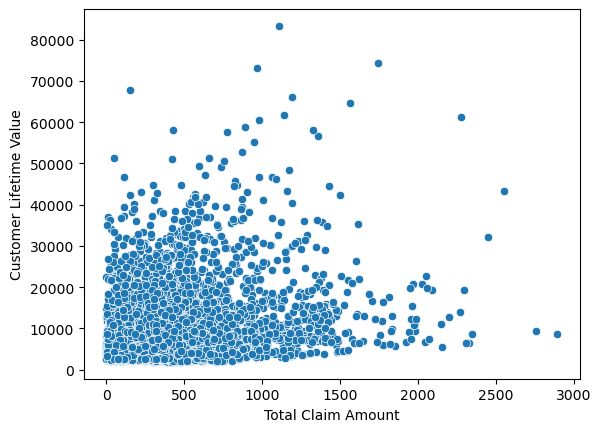

In [35]:
sns.scatterplot(x=df['Total Claim Amount'],y=df['Customer Lifetime Value'],data=df)
plt.show()

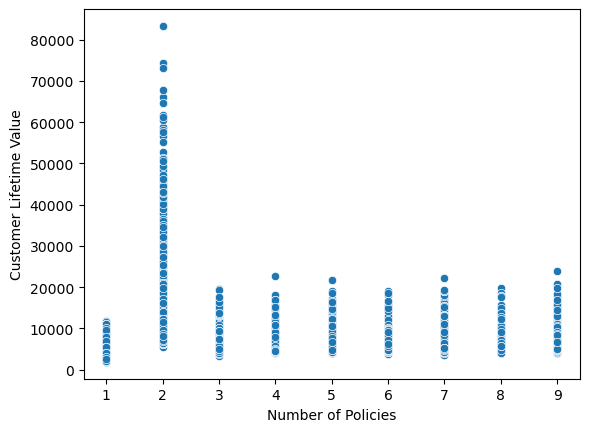

In [36]:
sns.scatterplot(x=df['Number of Policies'],y=df['Customer Lifetime Value'],data=df)
plt.show()

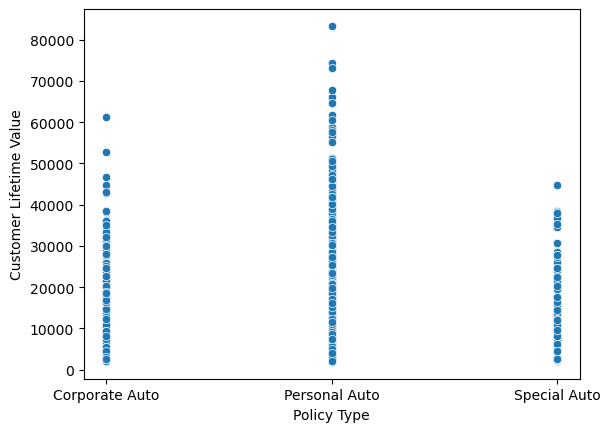

In [37]:
sns.scatterplot(x=df['Policy Type'],y=df['Customer Lifetime Value'],data=df)
plt.show()

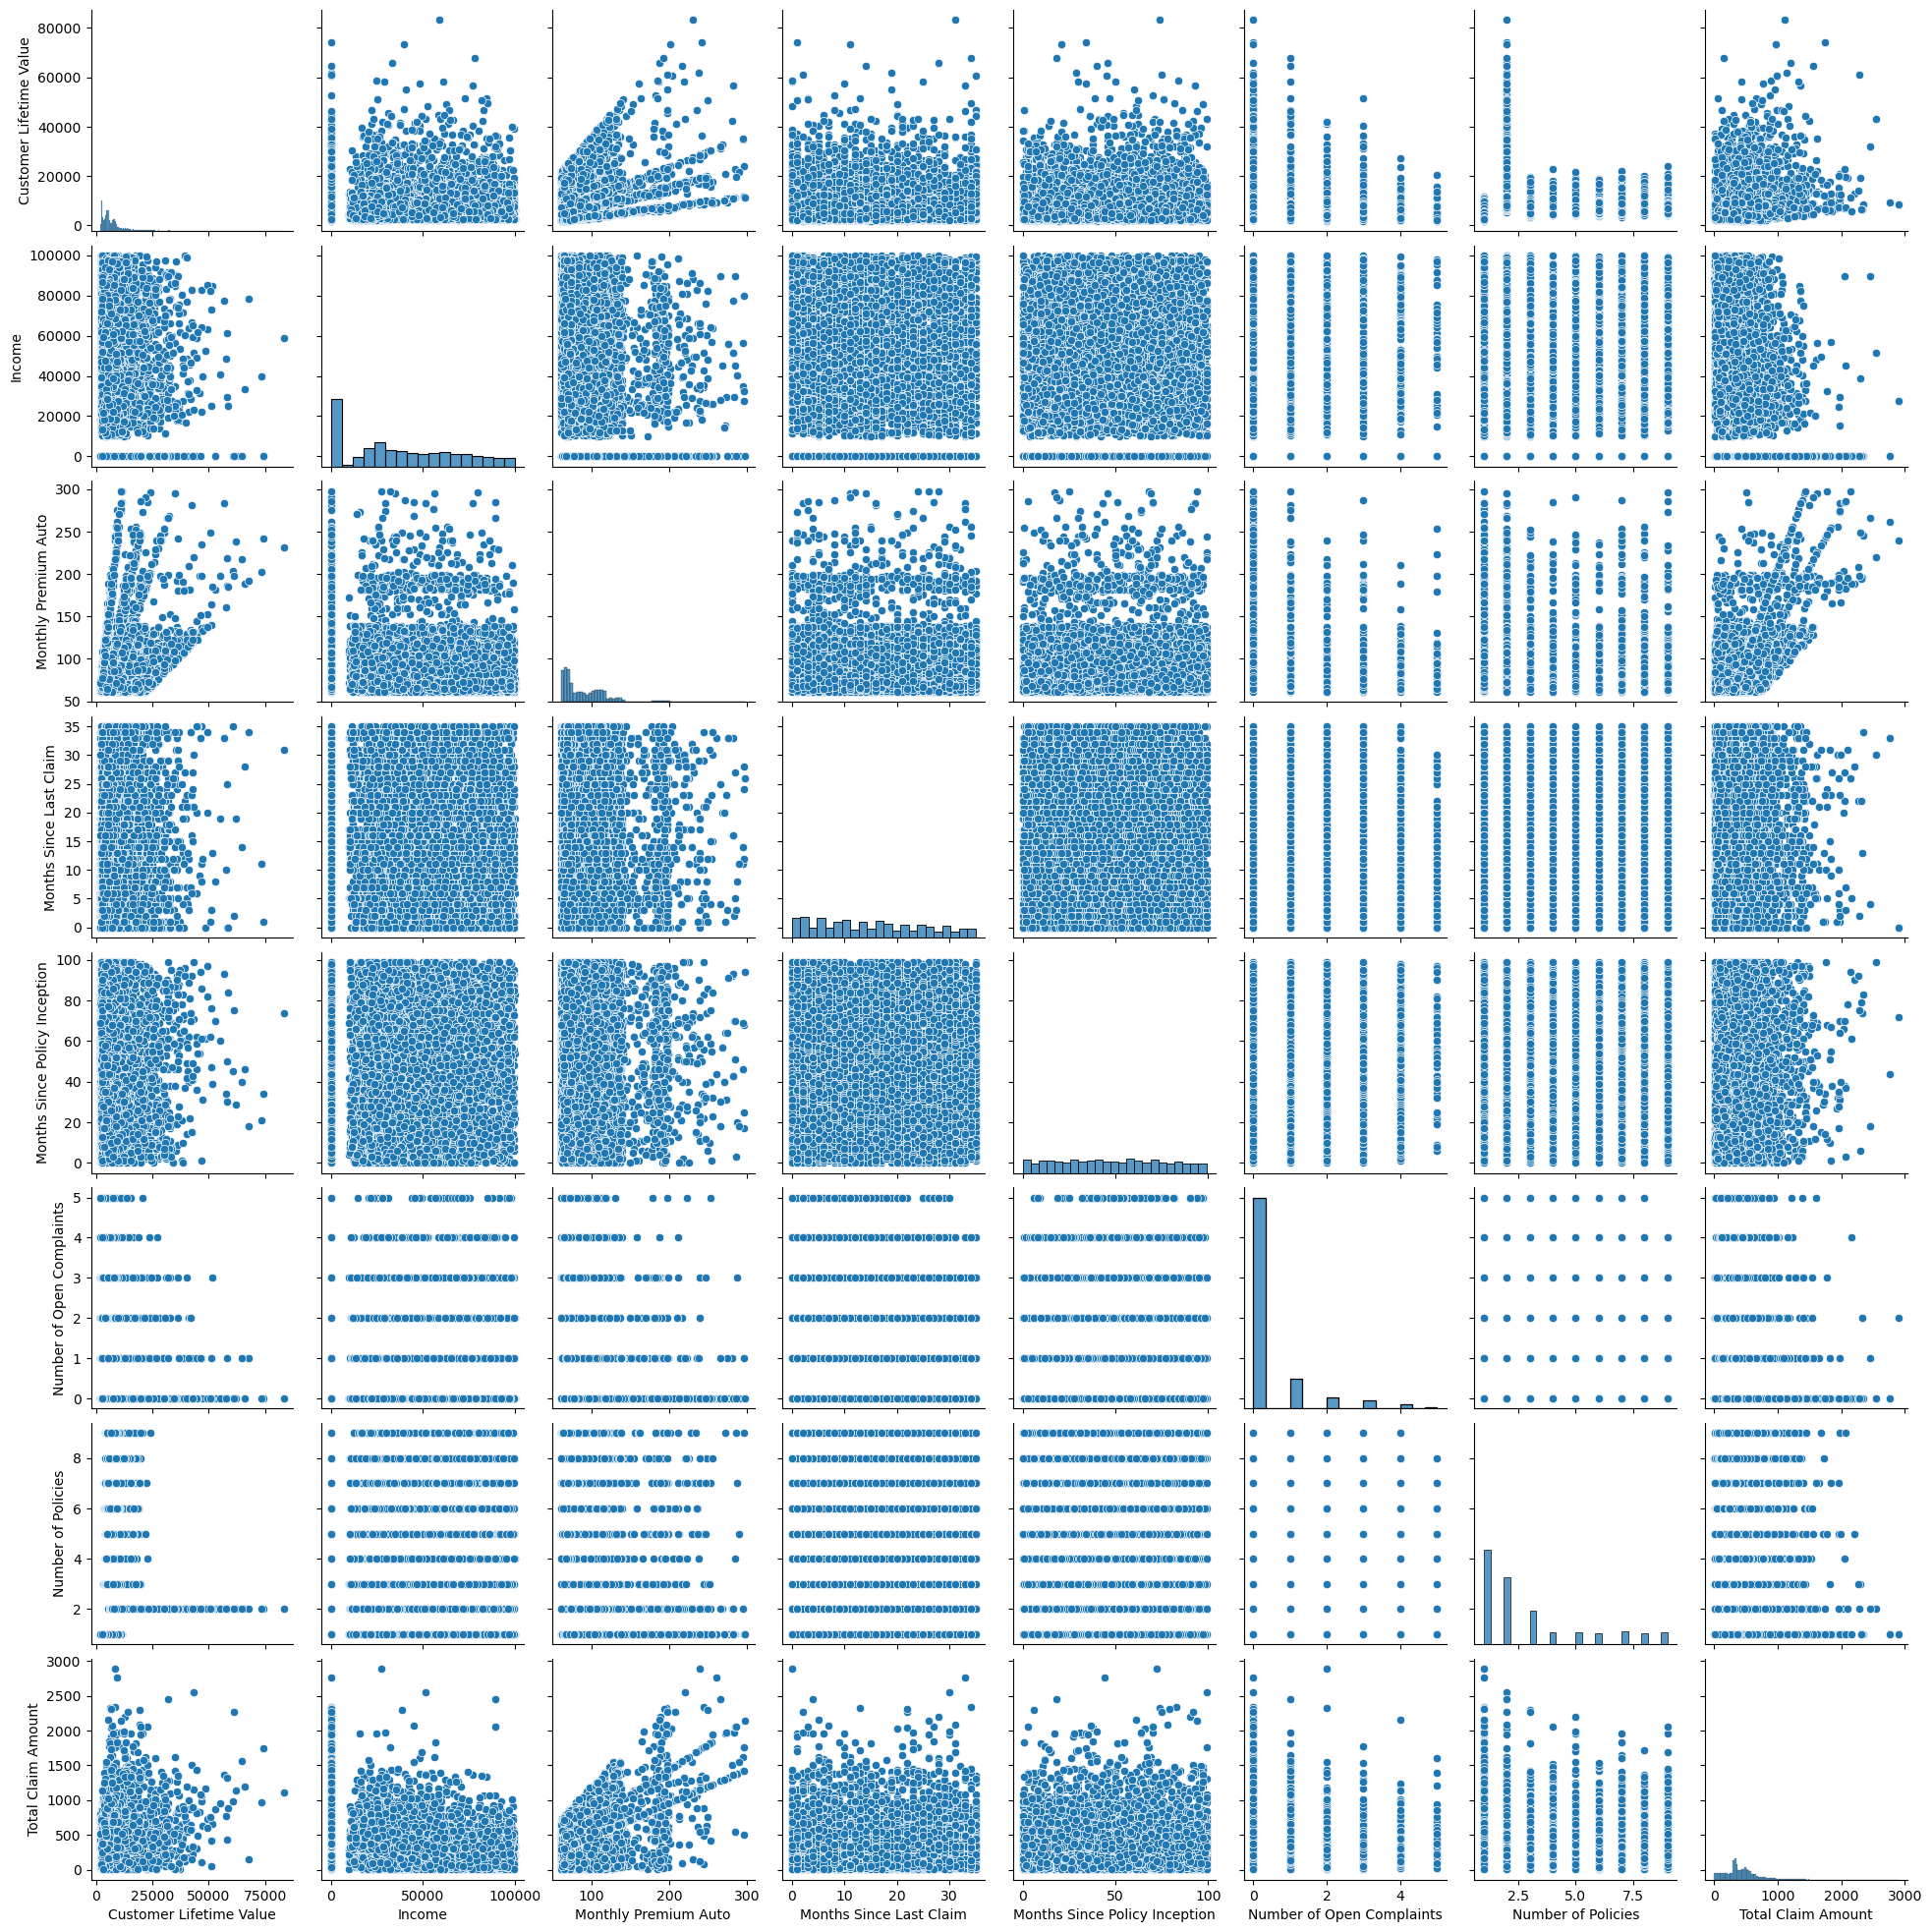

In [38]:
sns.pairplot(df)
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

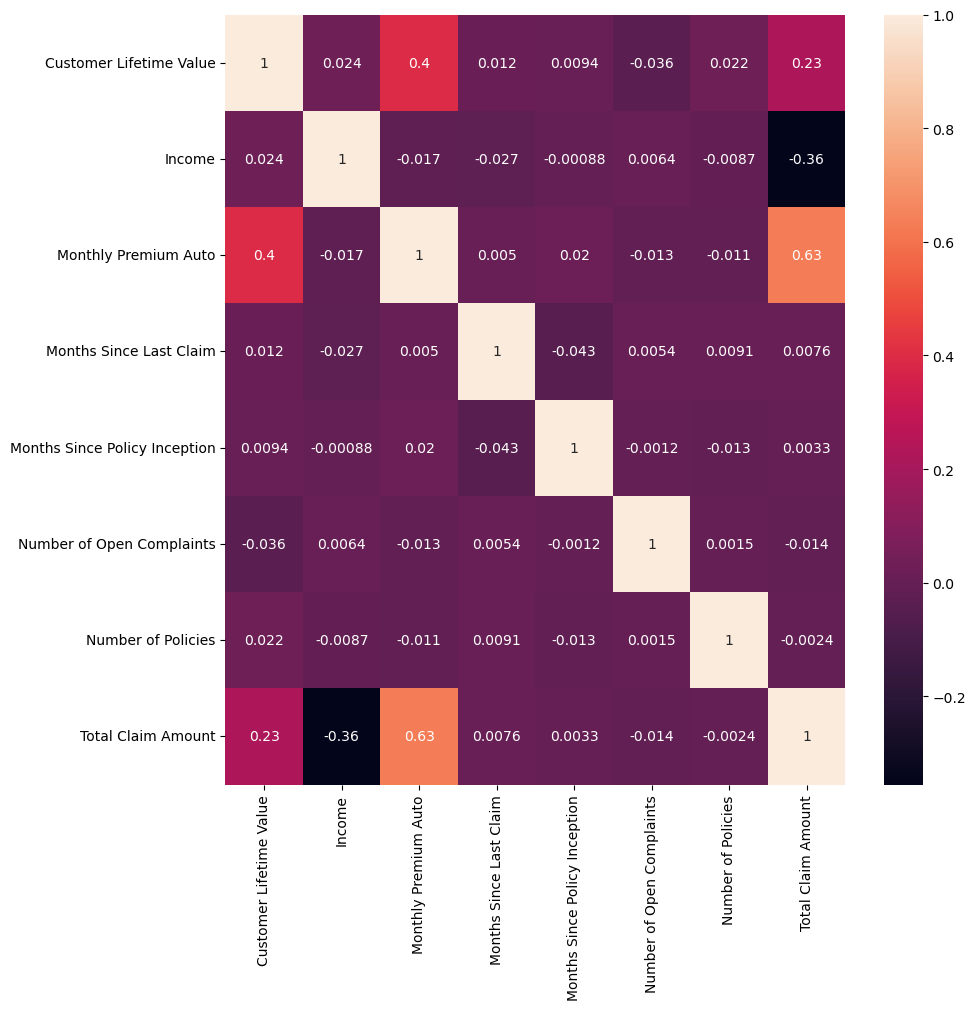

In [40]:
#Correlation between numeric feature
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [41]:
from sklearn.preprocessing import  LabelEncoder
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = LabelEncoder() 
  

In [42]:
df.select_dtypes('object').columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Encoding all the categorical features

In [43]:
for i in df.select_dtypes('object').columns:
    print("Before encoding the unique values of feature:", i)
    print(df[i].value_counts(),"\n\n")
    
    # Encode labels in column i
    df[i]= label_encoder.fit_transform(df[i]) 
    print("After encoding the unique values  of feature:", i)
    
    print(df[i].value_counts(),"\n\n")

Before encoding the unique values of feature: Customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
DB50188    1
DG23204    1
JS64688    1
IW56740    1
AQ30231    1
AK44985    1
FX55409    1
BK76107    1
AY26056    1
QR36329    1
GF70857    1
MU97512    1
OH98172    1
PD22502    1
US36532    1
JR84006    1
FN66436    1
YX84828    1
JH94846    1
TX73398    1
RX45809    1
RN86953    1
NX32730    1
RZ50353    1
QP32003    1
WN91943    1
BR24590    1
UI57491    1
UJ70796    1
QE46704    1
XF94560    1
VQ82774    1
EO87464    1
CR86548    1
XO11574    1
DM34321    1
WH56217    1
BV55733    1
PK37121    1
UF49068    1
FL55134    1
CH20044    1
NU57274    1
CV63337    1
GY87675    1
OH93496    1
AY99324    1
OL48469    1
OA26316    1
HZ64168    1
CR20811    1
FT79229    1
EI17753    1
EV15646    1
FF38892    1
PP35705    1
FQ24781    1
XT55646    1
QF69163    1
JH30819    1
YV88022    1
VF57165    1
AZ36763    1
FL50532    1
JP88955    1
AD33971    1
ES88339    1
NT79981  

## Converding the date feature in Day, Month and Year Columns


In [44]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [45]:
df['Effective To Date'].head()

0   1970-01-01 00:00:00.000000040
1   1970-01-01 00:00:00.000000020
2   1970-01-01 00:00:00.000000034
3   1970-01-01 00:00:00.000000009
4   1970-01-01 00:00:00.000000046
Name: Effective To Date, dtype: datetime64[ns]

In [46]:
df['Year'] = df['Effective To Date'].dt.strftime('%Y')
df['Month'] = df['Effective To Date'].dt.strftime('%m')

In [47]:
df['Date'] = df['Effective To Date'].dt.strftime('%d')

In [48]:
df['Date'].head()

0    01
1    01
2    01
3    01
4    01
Name: Date, dtype: object

In [49]:
df['Year'].head()

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Year, dtype: object

In [50]:
df['Month'].head()

0    01
1    01
2    01
3    01
4    01
Name: Month, dtype: object

In [51]:
df.drop(['Effective To Date'],axis=1,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int32  
 1   State                          9134 non-null   int32  
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   int32  
 4   Coverage                       9134 non-null   int32  
 5   Education                      9134 non-null   int32  
 6   EmploymentStatus               9134 non-null   int32  
 7   Gender                         9134 non-null   int32  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int32  
 10  Marital Status                 9134 non-null   int32  
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [53]:
df.head()

Customer  State  Customer Lifetime Value  Response  Coverage  Education  \
0       600      4              2763.519279         0         0          0   
1      5946      0              6979.535903         0         1          0   
2        96      2             12887.431650         0         2          0   
3      8016      1              7645.861827         0         0          0   
4      2488      4              2813.692575         0         0          0   

   EmploymentStatus  Gender  Income  Location Code  Marital Status  \
0                 1       0   56274              1               1   
1                 4       0       0              1               2   
2                 1       0   48767              1               1   
3                 4       1       0              1               1   
4                 1       1   43836              0               2   

   Monthly Premium Auto  Months Since Last Claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Policy Type  Policy  Renew Offer Type  Sales Channel  \
0                   1            0       2                 0              0   
1                   8            1       5                 2              0   
2                   2            1       5                 0              0   
3                   7            0       1                 0              2   
4                   1            1       3                 0              0   

   Total Claim Amount  Vehicle Class  Vehicle Size  Year Month Date  
0          384.811147              5             1  1970    01   01  
1         1131.464935              0             1  1970    01   01  
2          566.472247              5             1  1970    01   01  
3          529.881344              3             1  1970    01   01  
4          138.130879              0             1  1970    01   01

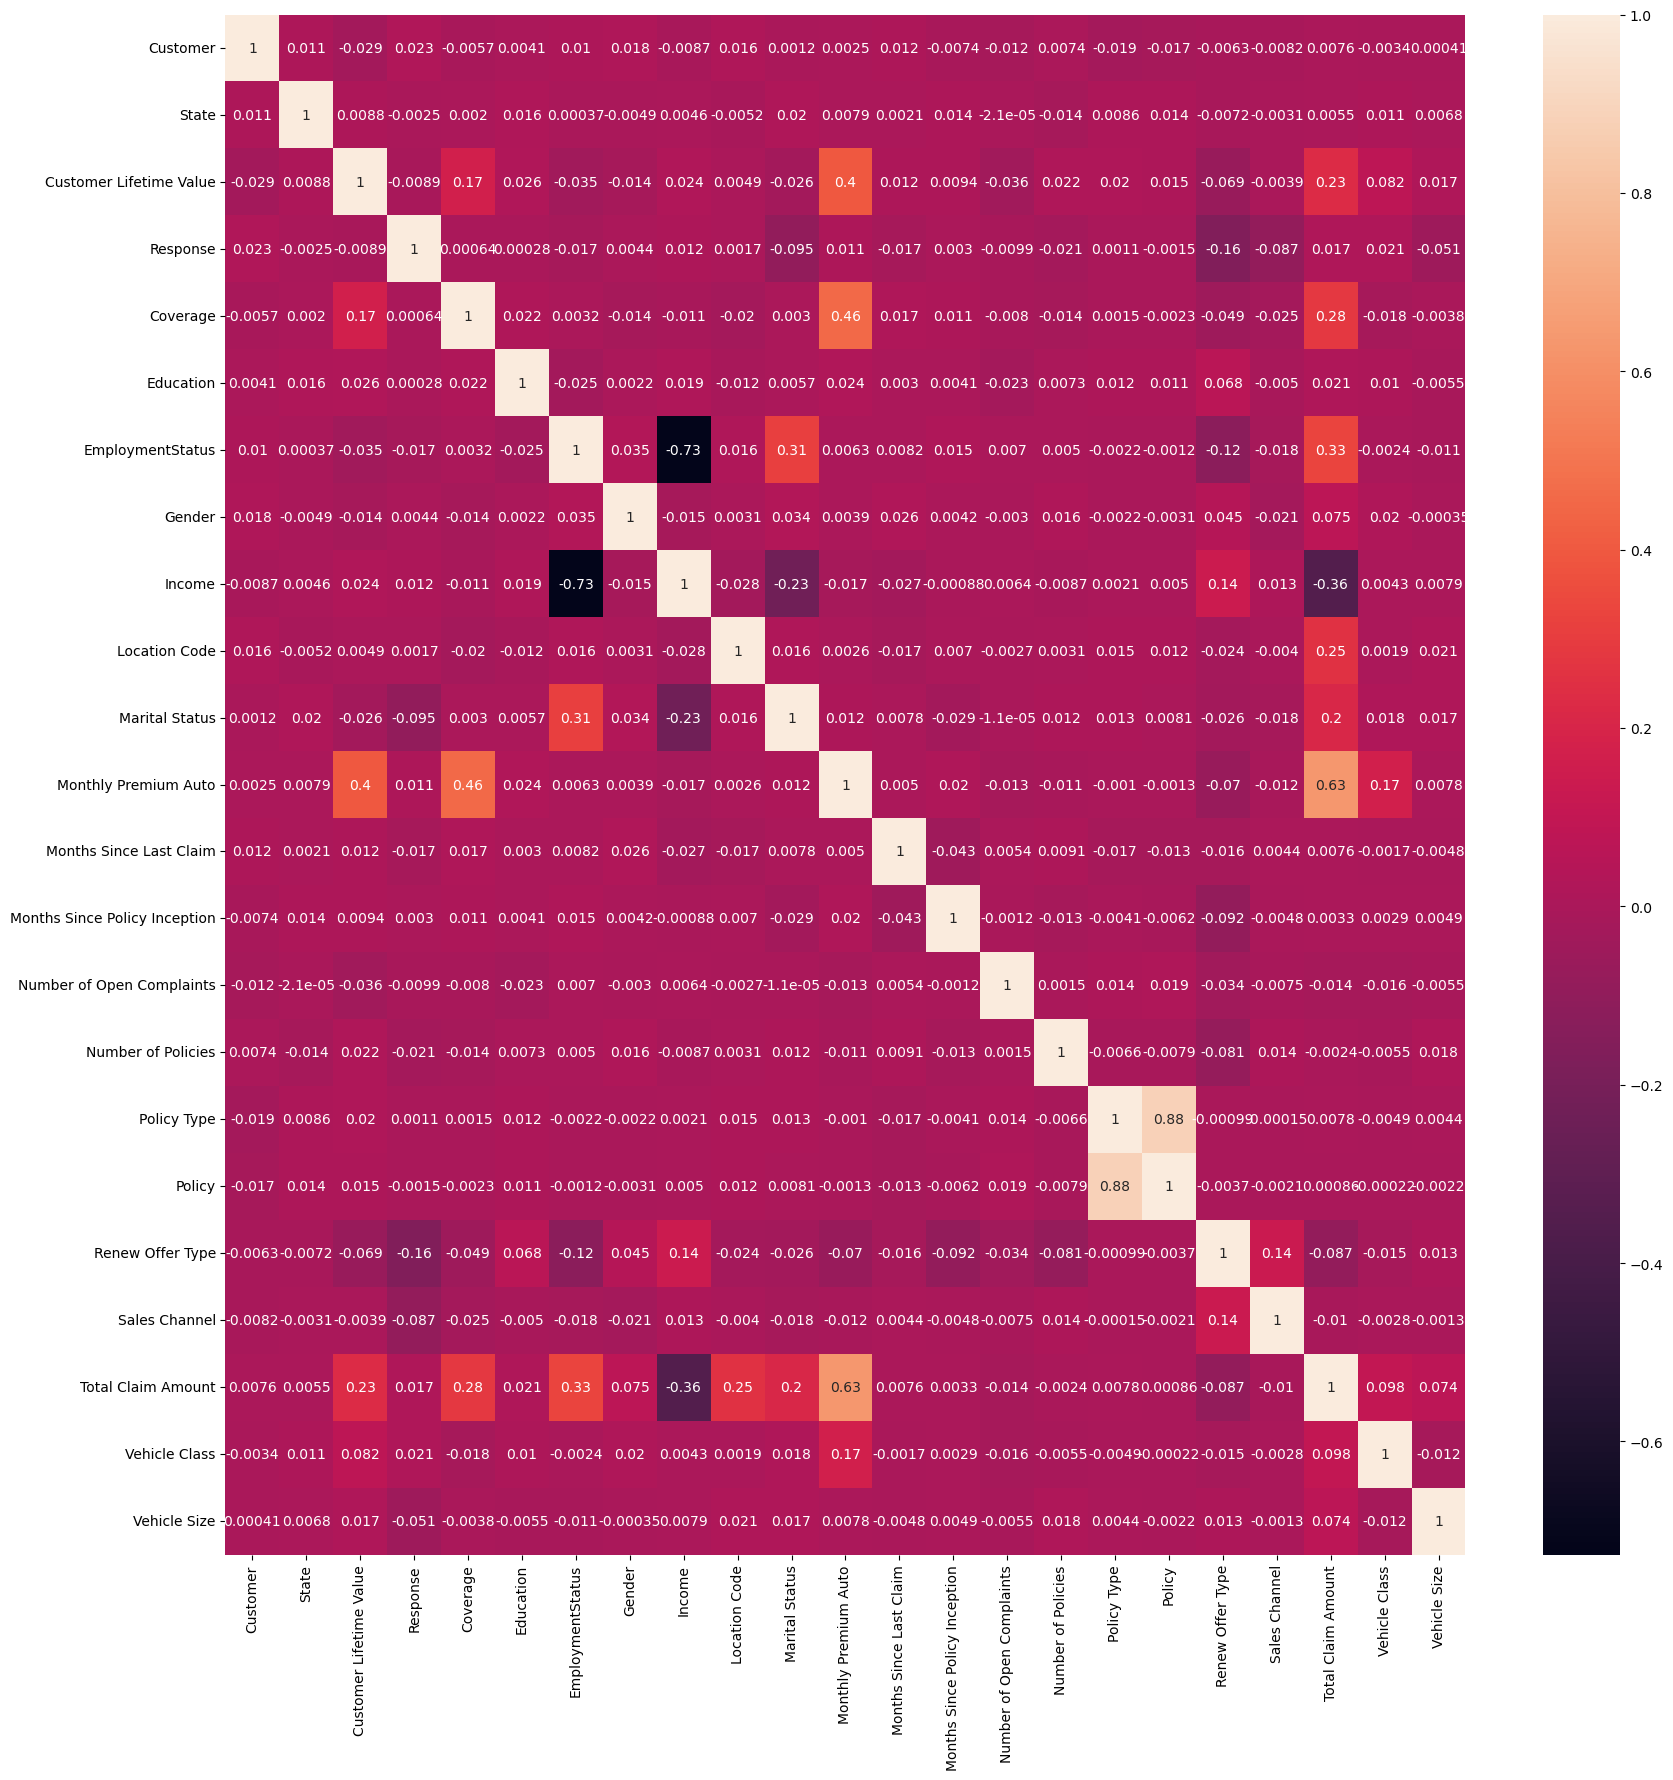

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()